In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading from a csv file, into a data frame
business_df = pd.read_csv('basic_business_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
business_df

,taxi_zone,business_type,Counts
0,10,financial_services,1
1,10,parking_and_automotive_services,13
2,10,professional_services,4
3,10,real_estate,58
4,10,retail_services,29
...,...,...,...
1363,98,retail_services,31
1364,98,transportation,5
1365,99,parking_and_automotive_services,1
1366,99,real_estate,2


In [3]:
taxi_df = pd.read_parquet("basic_taxi_df.parquet")
taxi_df

,taxi_zone,datetime,passenger_count,year_month,week,hour
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4
...,...,...,...,...,...,...
3061315,265,2023-04-30 19:00:00,41.0,2023-04,6,19
3061316,265,2023-04-30 20:00:00,53.0,2023-04,6,20
3061317,265,2023-04-30 21:00:00,45.0,2023-04,6,21
3061318,265,2023-04-30 22:00:00,62.0,2023-04,6,22


In [4]:
# Reshape the business_df dataframe using pivot
business_df_pivot = business_df.pivot(index='taxi_zone', columns='business_type', values='Counts').reset_index()

# Replace NaN values with 0
business_df_pivot.fillna(0, inplace=True)
business_df_pivot.columns.name = None



business_df_pivot


,taxi_zone,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation
0,3,1.0,0.0,0.0,29.0,24.0,110.0,40.0,1.0
1,4,0.0,0.0,0.0,0.0,2.0,5.0,22.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0
3,6,9.0,0.0,0.0,24.0,9.0,59.0,18.0,0.0
4,7,51.0,2.0,0.0,33.0,30.0,110.0,225.0,15.0
...,...,...,...,...,...,...,...,...,...
242,259,4.0,0.0,0.0,27.0,25.0,68.0,70.0,2.0
243,260,27.0,0.0,0.0,36.0,28.0,65.0,106.0,15.0
244,261,2.0,4.0,0.0,4.0,2.0,4.0,36.0,0.0
245,262,1.0,0.0,0.0,40.0,2.0,11.0,30.0,2.0


# connect hospital dataset

In [5]:
# Reading from a csv file, into a data frame
hospital_df = pd.read_csv('basic_HospitalData_version_1.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# modify the structure of the dataset for further connection
hospital_df = hospital_df.rename(columns={'location_id': 'taxi_zone', 'Counts': 'hospital'})
hospital_df = hospital_df.drop('Industry', axis=1)


hospital_df

,taxi_zone,hospital
0,10,1
1,112,1
2,118,1
3,121,2
4,127,1
5,130,1
6,137,2
7,144,1
8,156,1
9,166,1


In [6]:
# Merge business_df_pivot and hospital_df on 'taxi_zone' using inner join
business_df_pivot = business_df_pivot.merge(hospital_df, on='taxi_zone', how='left')
# Replace NaN values with 0
business_df_pivot.fillna(0, inplace=True)
business_df_pivot

,taxi_zone,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital
0,3,1.0,0.0,0.0,29.0,24.0,110.0,40.0,1.0,0.0
1,4,0.0,0.0,0.0,0.0,2.0,5.0,22.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0,0.0
3,6,9.0,0.0,0.0,24.0,9.0,59.0,18.0,0.0,0.0
4,7,51.0,2.0,0.0,33.0,30.0,110.0,225.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...
242,259,4.0,0.0,0.0,27.0,25.0,68.0,70.0,2.0,0.0
243,260,27.0,0.0,0.0,36.0,28.0,65.0,106.0,15.0,0.0
244,261,2.0,4.0,0.0,4.0,2.0,4.0,36.0,0.0,0.0
245,262,1.0,0.0,0.0,40.0,2.0,11.0,30.0,2.0,0.0


# connect hotspot dataset

In [7]:
# Reading from a csv file, into a data frame
hotspot_df = pd.read_csv('basic_hotspot_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
hotspot_df

,location_id,Wifi Type,Counts
0,10,Free Wifi,1
1,10,Limited Free Wifi,16
2,100,Free Wifi,21
3,101,Free Wifi,1
4,102,Free Wifi,1
...,...,...,...
304,94,Free Wifi,9
305,95,Free Wifi,30
306,97,Free Wifi,46
307,98,Free Wifi,2


In [8]:
# Group the data by 'location_id' and sum 'Counts'
hotspot_df = hotspot_df.groupby('location_id')['Counts'].sum().reset_index()
hotspot_df = hotspot_df.rename(columns={'location_id': 'taxi_zone', 'Counts': 'hotspots'})
hotspot_df

,taxi_zone,hotspots
0,6,3
1,7,54
2,8,1
3,9,1
4,10,17
...,...,...
221,258,19
222,259,3
223,260,16
224,261,11


In [9]:
# Merge hotspot_df on 'taxi_zone' using inner join
business_df_pivot = business_df_pivot.merge(hotspot_df, on='taxi_zone', how='left')
# Replace NaN values with 0
business_df_pivot.fillna(0, inplace=True)
business_df_pivot

,taxi_zone,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots
0,3,1.0,0.0,0.0,29.0,24.0,110.0,40.0,1.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,2.0,5.0,22.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0,0.0,0.0
3,6,9.0,0.0,0.0,24.0,9.0,59.0,18.0,0.0,0.0,3.0
4,7,51.0,2.0,0.0,33.0,30.0,110.0,225.0,15.0,1.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
242,259,4.0,0.0,0.0,27.0,25.0,68.0,70.0,2.0,0.0,3.0
243,260,27.0,0.0,0.0,36.0,28.0,65.0,106.0,15.0,0.0,16.0
244,261,2.0,4.0,0.0,4.0,2.0,4.0,36.0,0.0,0.0,11.0
245,262,1.0,0.0,0.0,40.0,2.0,11.0,30.0,2.0,0.0,0.0


# connect school dataset

In [10]:

# Reading from a csv file, into a data frame
school_df = pd.read_csv('basic_EducationData.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
school_df

,Taxi_zone,Educational Facility,Counts
0,10,Education,8
1,101,Education,6
2,102,Education,3
3,103,Education,1
4,106,Education,1
...,...,...,...
218,92,Education,11
219,94,Education,12
220,95,Education,12
221,97,Education,12


In [11]:
# modify the structure of the dataset for further connection
school_df = school_df.rename(columns={'Taxi_zone': 'taxi_zone', 'Counts': 'school'})
school_df = school_df.drop('Educational Facility', axis=1)
school_df

,taxi_zone,school
0,10,8
1,101,6
2,102,3
3,103,1
4,106,1
...,...,...
218,92,11
219,94,12
220,95,12
221,97,12


In [12]:
# Merge school_df on 'taxi_zone' using inner join
business_df_pivot = business_df_pivot.merge(school_df, on='taxi_zone', how='left')
# Replace NaN values with 0
business_df_pivot.fillna(0, inplace=True)
business_df_pivot

,taxi_zone,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school
0,3,1.0,0.0,0.0,29.0,24.0,110.0,40.0,1.0,0.0,0.0,6.0
1,4,0.0,0.0,0.0,0.0,2.0,5.0,22.0,0.0,0.0,0.0,9.0
2,5,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0,0.0,0.0,2.0
3,6,9.0,0.0,0.0,24.0,9.0,59.0,18.0,0.0,0.0,3.0,4.0
4,7,51.0,2.0,0.0,33.0,30.0,110.0,225.0,15.0,1.0,54.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,259,4.0,0.0,0.0,27.0,25.0,68.0,70.0,2.0,0.0,3.0,5.0
243,260,27.0,0.0,0.0,36.0,28.0,65.0,106.0,15.0,0.0,16.0,4.0
244,261,2.0,4.0,0.0,4.0,2.0,4.0,36.0,0.0,0.0,11.0,3.0
245,262,1.0,0.0,0.0,40.0,2.0,11.0,30.0,2.0,0.0,0.0,1.0


In [13]:
# Add 'total_business' column to business_df_pivot
business_df_pivot['total_business'] = business_df_pivot.iloc[:, 1:].sum(axis=1)

business_df_pivot.head(10)

,taxi_zone,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,3,1.0,0.0,0.0,29.0,24.0,110.0,40.0,1.0,0.0,0.0,6.0,211.0
1,4,0.0,0.0,0.0,0.0,2.0,5.0,22.0,0.0,0.0,0.0,9.0,38.0
2,5,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0,0.0,0.0,2.0,45.0
3,6,9.0,0.0,0.0,24.0,9.0,59.0,18.0,0.0,0.0,3.0,4.0,126.0
4,7,51.0,2.0,0.0,33.0,30.0,110.0,225.0,15.0,1.0,54.0,11.0,532.0
5,9,1.0,0.0,0.0,8.0,4.0,37.0,24.0,0.0,0.0,1.0,4.0,79.0
6,10,0.0,1.0,0.0,13.0,4.0,58.0,29.0,0.0,1.0,17.0,8.0,131.0
7,11,0.0,1.0,0.0,7.0,8.0,67.0,61.0,5.0,0.0,8.0,4.0,161.0
8,12,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0
9,13,1.0,3.0,0.0,21.0,1.0,4.0,9.0,0.0,0.0,1.0,5.0,45.0


In [14]:
# Ensure the data types of 'taxi_zone' columns are the same
print(taxi_df['taxi_zone'].dtype)
print(business_df_pivot['taxi_zone'].dtype)

# If they are not the same, convert one or both to match
# e.g., if 'taxi_zone' in taxi_df is int and in business_df_pivot is object
# business_df_pivot['taxi_zone'] = business_df_pivot['taxi_zone'].astype(int)

# Check unique 'taxi_zone' values in both dataframes
print(taxi_df['taxi_zone'].unique())
print(business_df_pivot['taxi_zone'].unique())



int64
int64
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 24

# Merge taxi_df and business hospital, school, hotsport data

In [15]:
# Merge taxi_df and business on 'taxi_zone' using inner join
combined_df = taxi_df.merge(business_df_pivot, on='taxi_zone', how='left')
# Replace NaN values with 0
combined_df.fillna(0, inplace=True)
combined_df.head(100000)

,taxi_zone,datetime,passenger_count,year_month,week,hour,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9,2022-10-14 11:00:00,0.0,2022-10,4,11,1.0,0.0,0.0,8.0,4.0,37.0,24.0,0.0,0.0,1.0,4.0,79.0
99996,9,2022-10-14 12:00:00,0.0,2022-10,4,12,1.0,0.0,0.0,8.0,4.0,37.0,24.0,0.0,0.0,1.0,4.0,79.0
99997,9,2022-10-14 13:00:00,0.0,2022-10,4,13,1.0,0.0,0.0,8.0,4.0,37.0,24.0,0.0,0.0,1.0,4.0,79.0
99998,9,2022-10-14 14:00:00,0.0,2022-10,4,14,1.0,0.0,0.0,8.0,4.0,37.0,24.0,0.0,0.0,1.0,4.0,79.0


# connect the holiday dataset

In [16]:

import holidays

# Create a dictionary of US holidays for 2022 and 2023
us_holidays = dict(holidays.US(years=[2022, 2023]))

# Assuming df is your DataFrame and 'datetime' is your date column
# First, ensure that your 'datetime' column is indeed a datetime object
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Create a new 'holiday' column. If the date is a US holiday, it will have the holiday's name;
# otherwise, it will be "No"
combined_df['holiday'] = combined_df['datetime'].dt.date.apply(lambda x: us_holidays.get(x, "No"))
combined_df



,taxi_zone,datetime,passenger_count,year_month,week,hour,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061315,265,2023-04-30 19:00:00,41.0,2023-04,6,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061316,265,2023-04-30 20:00:00,53.0,2023-04,6,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061317,265,2023-04-30 21:00:00,45.0,2023-04,6,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3061318,265,2023-04-30 22:00:00,62.0,2023-04,6,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [17]:
combined_df.to_csv("train_data_1.csv", index=False)

In [18]:
combined_df.dtypes

taxi_zone                                   int64
datetime                           datetime64[ns]
passenger_count                           float64
year_month                              period[M]
week                                        int32
hour                                        int32
entertainment_and_recreation              float64
financial_services                        float64
food_and_beverage                         float64
parking_and_automotive_services           float64
professional_services                     float64
real_estate                               float64
retail_services                           float64
transportation                            float64
hospital                                  float64
hotspots                                  float64
school                                    float64
total_business                            float64
holiday                                    object
dtype: object

In [19]:
 # check null value
combined_df.isnull().sum()

taxi_zone                          0
datetime                           0
passenger_count                    0
year_month                         0
week                               0
hour                               0
entertainment_and_recreation       0
financial_services                 0
food_and_beverage                  0
parking_and_automotive_services    0
professional_services              0
real_estate                        0
retail_services                    0
transportation                     0
hospital                           0
hotspots                           0
school                             0
total_business                     0
holiday                            0
dtype: int64

In [20]:
#update all columns of type 'numeric'
numeric_columns = combined_df.select_dtypes(['float64']).columns
numeric_columns

Index(['passenger_count', 'entertainment_and_recreation', 'financial_services',
       'food_and_beverage', 'parking_and_automotive_services',
       'professional_services', 'real_estate', 'retail_services',
       'transportation', 'hospital', 'hotspots', 'school', 'total_business'],
      dtype='object')

In [21]:
# set categorical types
combined_df['taxi_zone'] = combined_df['taxi_zone'].astype('category')
combined_df['year_month'] = combined_df['year_month'].astype('category')
combined_df['week'] = combined_df['week'].astype('category')
combined_df['hour'] = combined_df['hour'].astype('category')
combined_df['week'] = combined_df['week'].astype('category')
combined_df['holiday'] = combined_df['holiday'].astype('category')
category_columns = combined_df.select_dtypes(['category']).columns
category_columns

Index(['taxi_zone', 'year_month', 'week', 'hour', 'holiday'], dtype='object')

In [22]:
combined_df.dtypes

taxi_zone                                category
datetime                           datetime64[ns]
passenger_count                           float64
year_month                               category
week                                     category
hour                                     category
entertainment_and_recreation              float64
financial_services                        float64
food_and_beverage                         float64
parking_and_automotive_services           float64
professional_services                     float64
real_estate                               float64
retail_services                           float64
transportation                            float64
hospital                                  float64
hotspots                                  float64
school                                    float64
total_business                            float64
holiday                                  category
dtype: object

In [23]:
combined_df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_count,3061320.0,48.399134,130.221785,0.0,0.0,2.0,16.0,2341.0
entertainment_and_recreation,3061320.0,6.646388,13.979634,0.0,0.0,1.0,7.0,90.0
financial_services,3061320.0,1.300380,2.499635,0.0,0.0,1.0,2.0,30.0
food_and_beverage,3061320.0,0.091255,0.336668,0.0,0.0,0.0,0.0,3.0
parking_and_automotive_services,3061320.0,15.878327,13.889039,0.0,5.0,12.0,24.0,73.0
professional_services,3061320.0,13.140684,15.538474,0.0,2.0,9.0,18.0,124.0
real_estate,3061320.0,38.311787,38.099058,0.0,11.0,28.0,54.0,235.0
retail_services,3061320.0,61.418251,52.524419,0.0,24.0,55.0,83.0,333.0
transportation,3061320.0,3.566540,10.092838,0.0,0.0,0.0,2.0,81.0
hospital,3061320.0,0.296578,0.856350,0.0,0.0,0.0,0.0,7.0


array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'entertainment_and_recreation'}>,
        <Axes: title={'center': 'financial_services'}>,
        <Axes: title={'center': 'food_and_beverage'}>],
       [<Axes: title={'center': 'parking_and_automotive_services'}>,
        <Axes: title={'center': 'professional_services'}>,
        <Axes: title={'center': 'real_estate'}>,
        <Axes: title={'center': 'retail_services'}>],
       [<Axes: title={'center': 'transportation'}>,
        <Axes: title={'center': 'hospital'}>,
        <Axes: title={'center': 'hotspots'}>,
        <Axes: title={'center': 'school'}>],
       [<Axes: title={'center': 'total_business'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

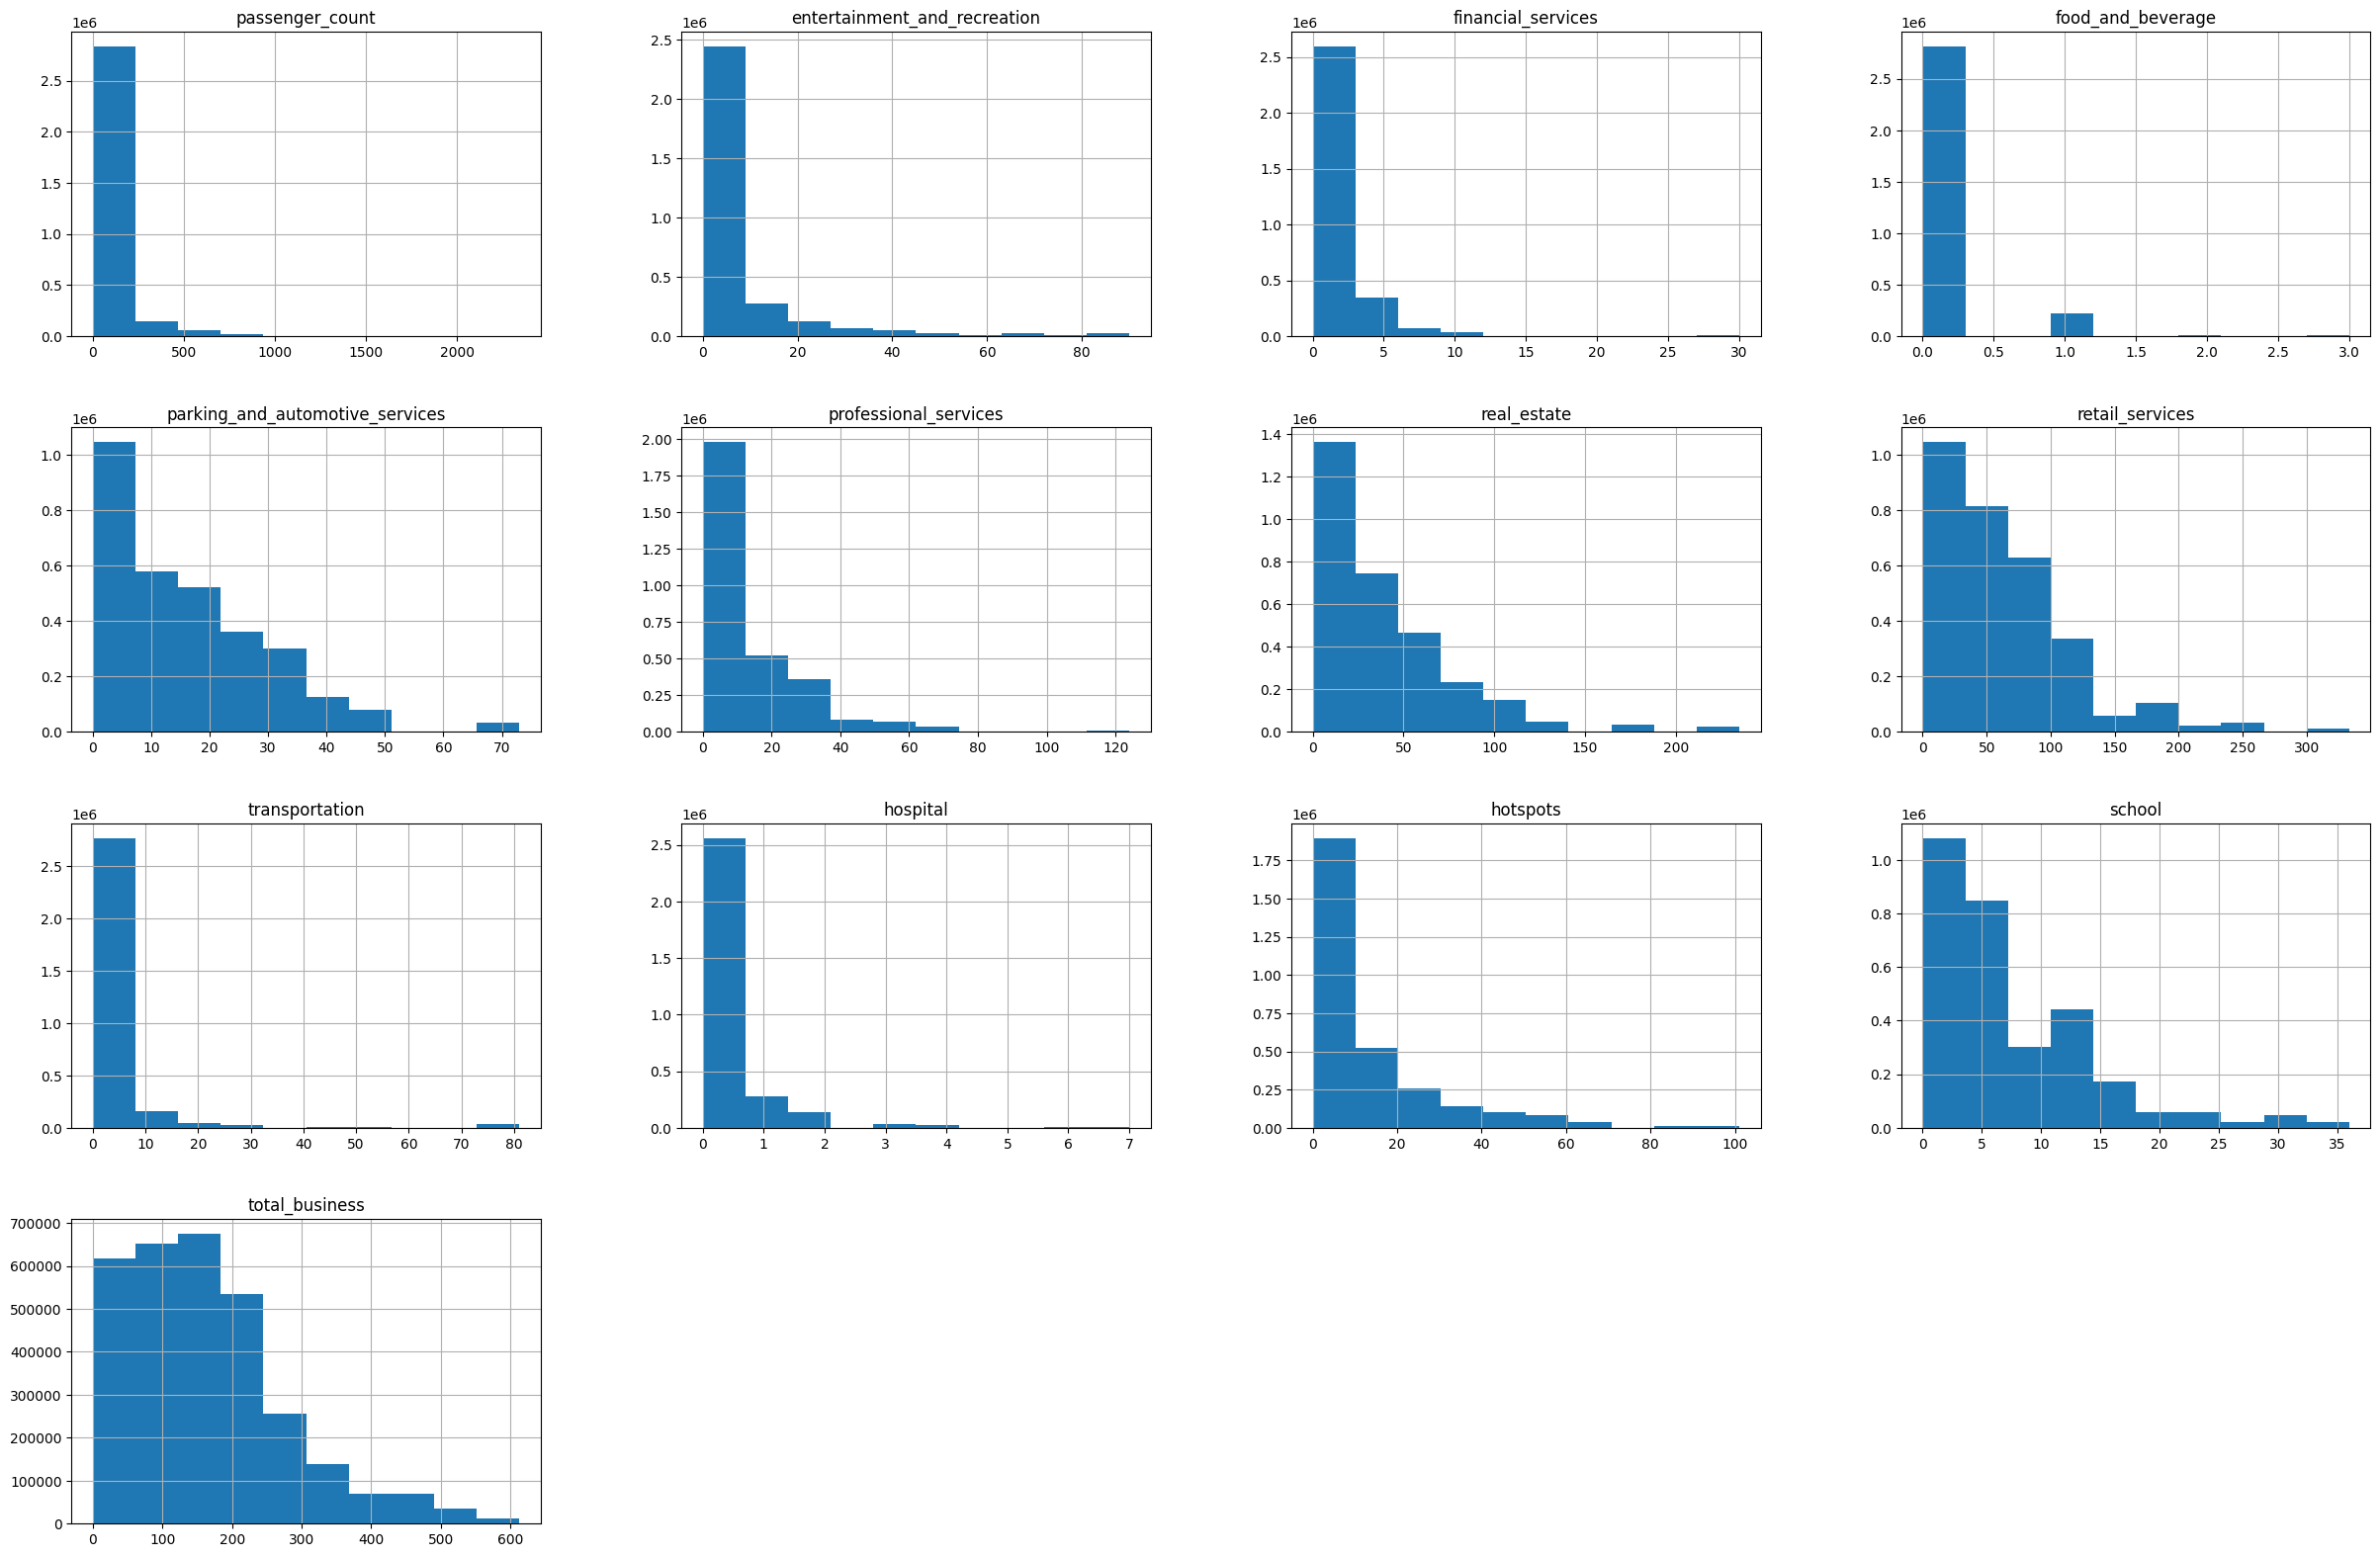

In [24]:
# Plot a histogram summary sheet of the continuous features and save in a png file
combined_df[numeric_columns].hist(layout=(6, 4), figsize=(30,30), bins=10)
# plt.savefig('continuous_histograms_1-1.pdf')

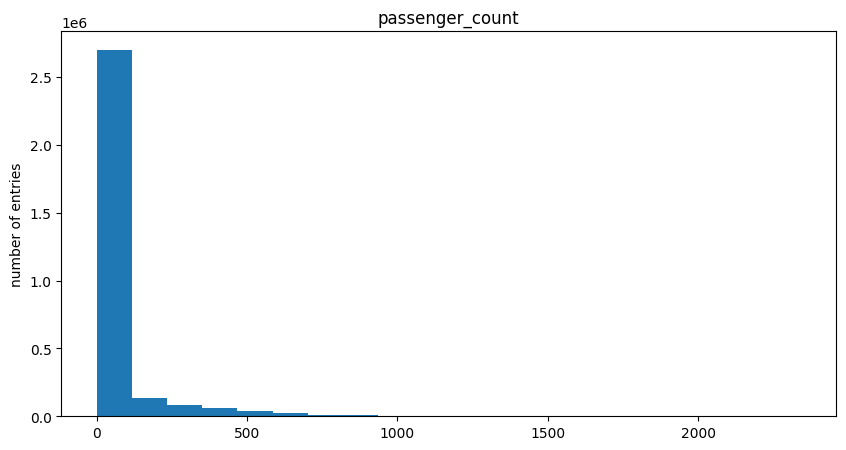

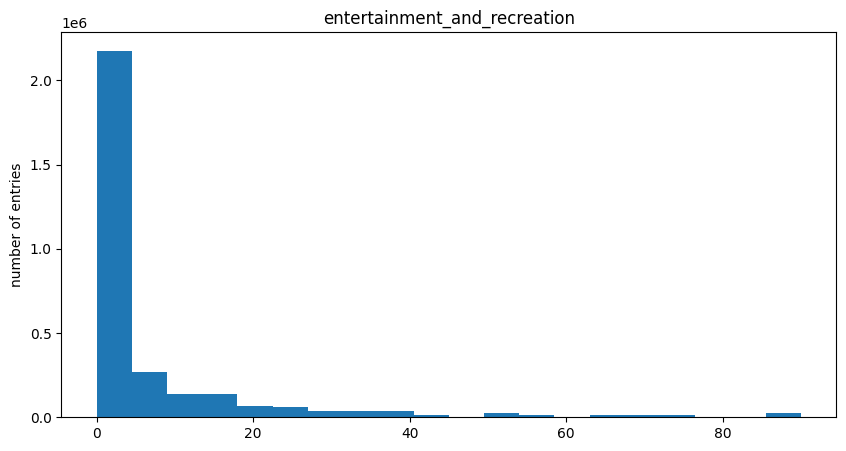

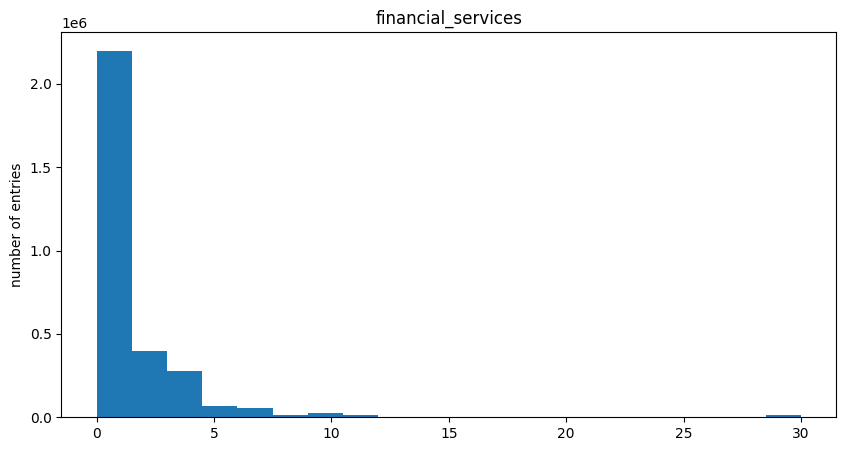

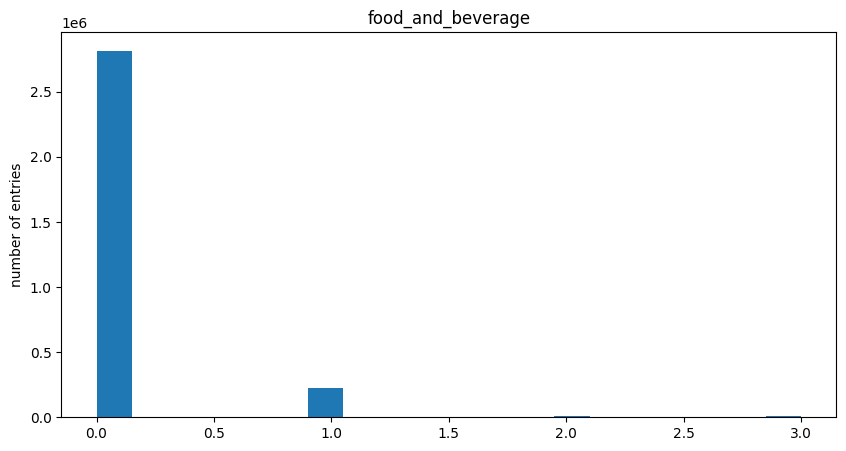

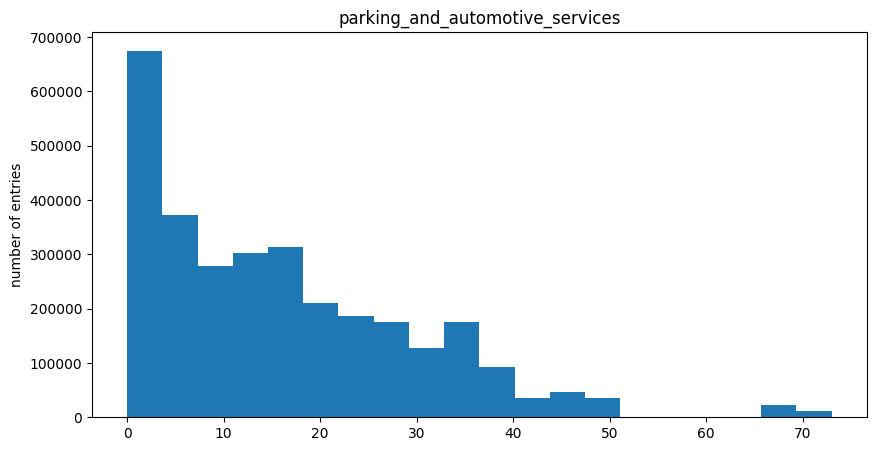

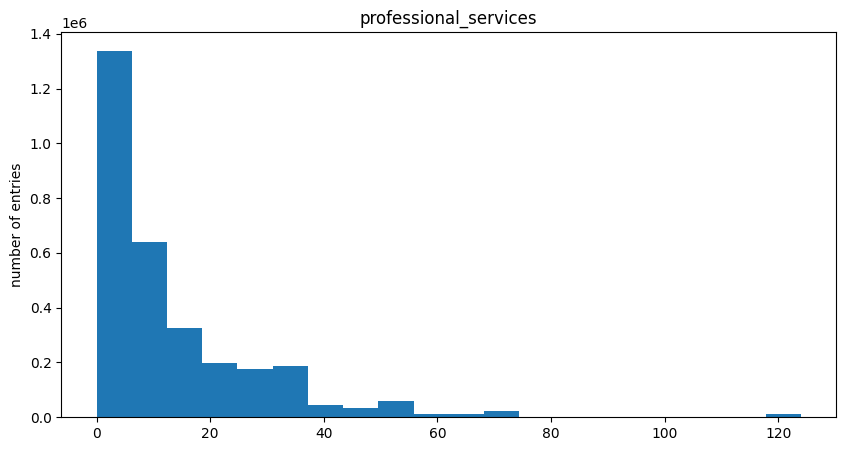

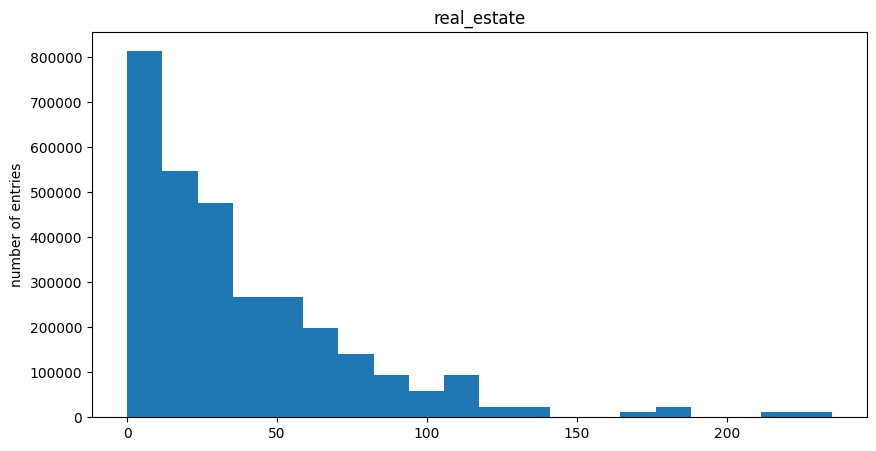

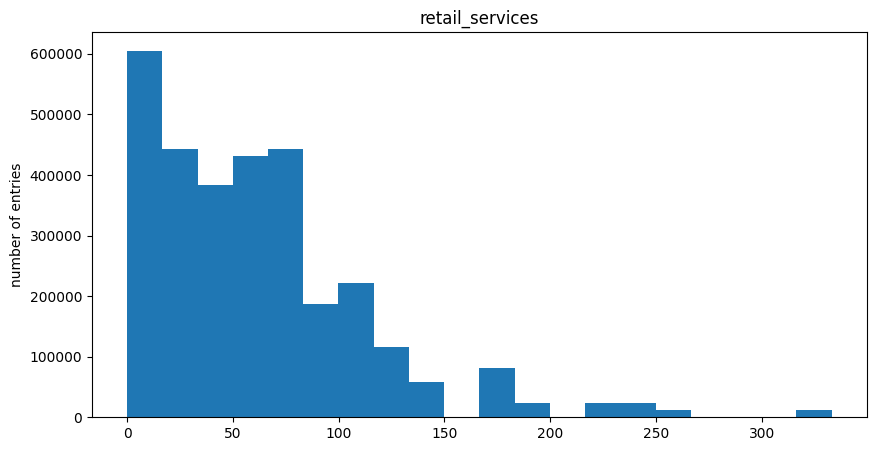

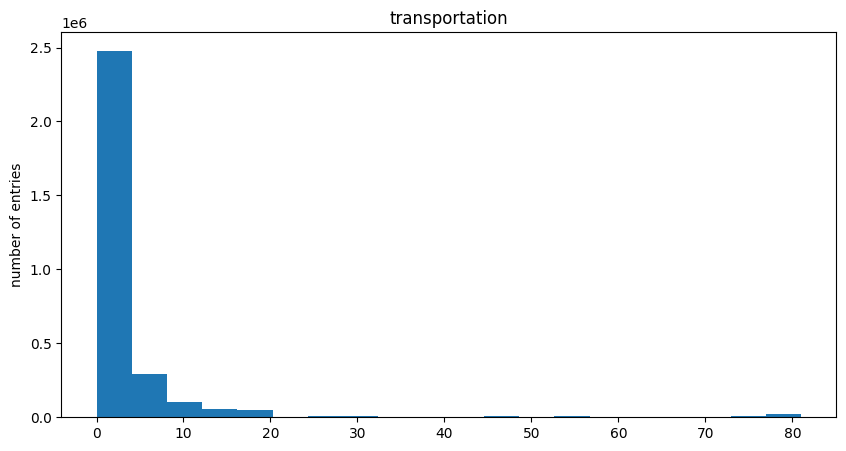

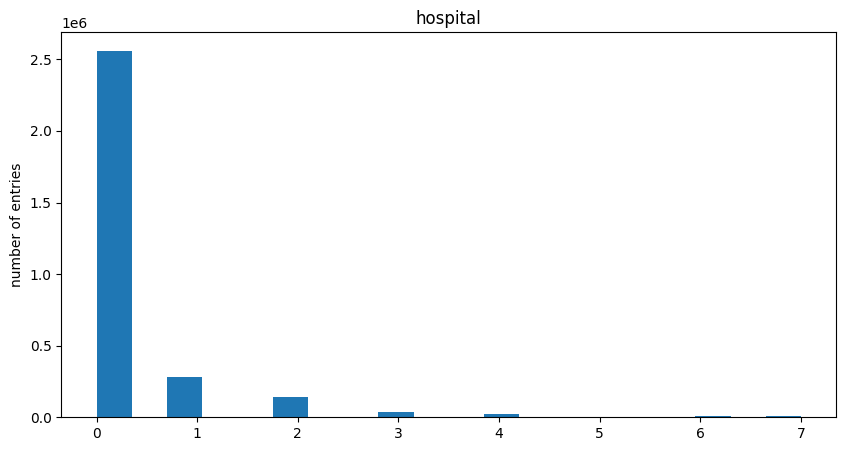

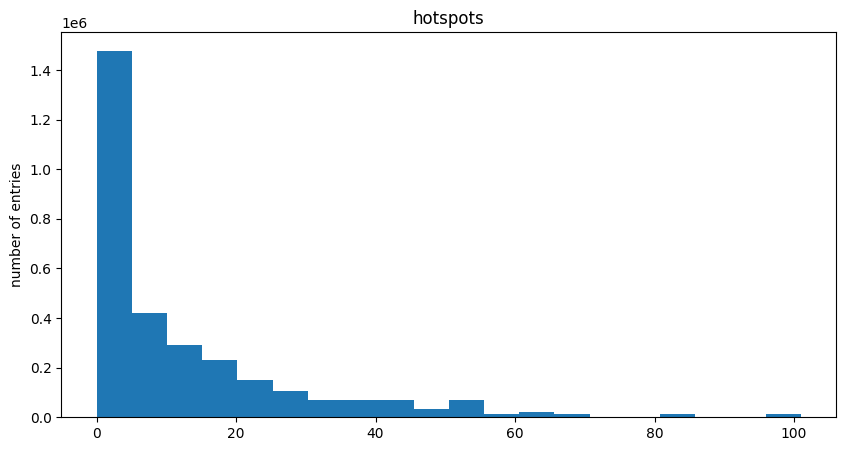

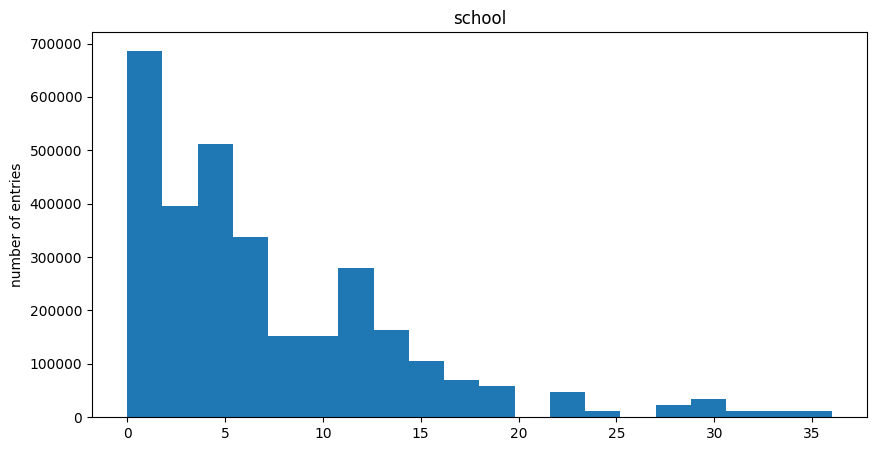

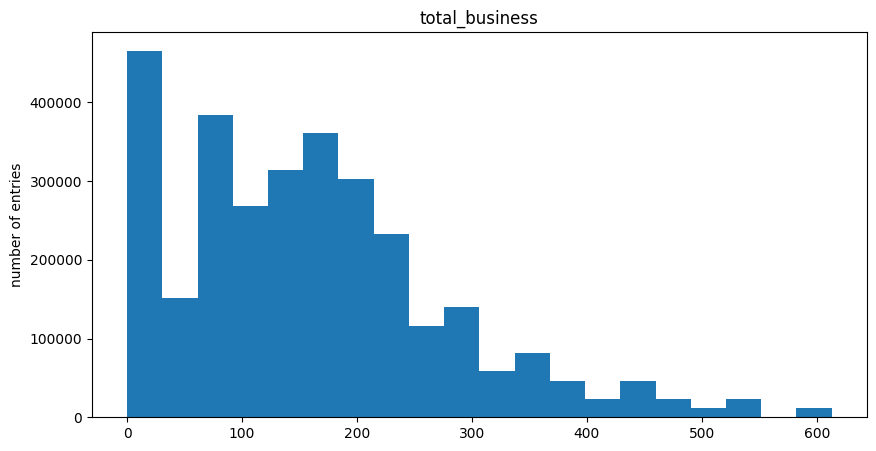

In [25]:
for col in numeric_columns:
        f = combined_df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()    

passenger_count                        Axes(0.125,0.77;0.168478x0.11)
entertainment_and_recreation        Axes(0.327174,0.77;0.168478x0.11)
financial_services                  Axes(0.529348,0.77;0.168478x0.11)
food_and_beverage                   Axes(0.731522,0.77;0.168478x0.11)
parking_and_automotive_services       Axes(0.125,0.638;0.168478x0.11)
professional_services              Axes(0.327174,0.638;0.168478x0.11)
real_estate                        Axes(0.529348,0.638;0.168478x0.11)
retail_services                    Axes(0.731522,0.638;0.168478x0.11)
transportation                        Axes(0.125,0.506;0.168478x0.11)
hospital                           Axes(0.327174,0.506;0.168478x0.11)
hotspots                           Axes(0.529348,0.506;0.168478x0.11)
school                             Axes(0.731522,0.506;0.168478x0.11)
total_business                        Axes(0.125,0.374;0.168478x0.11)
dtype: object

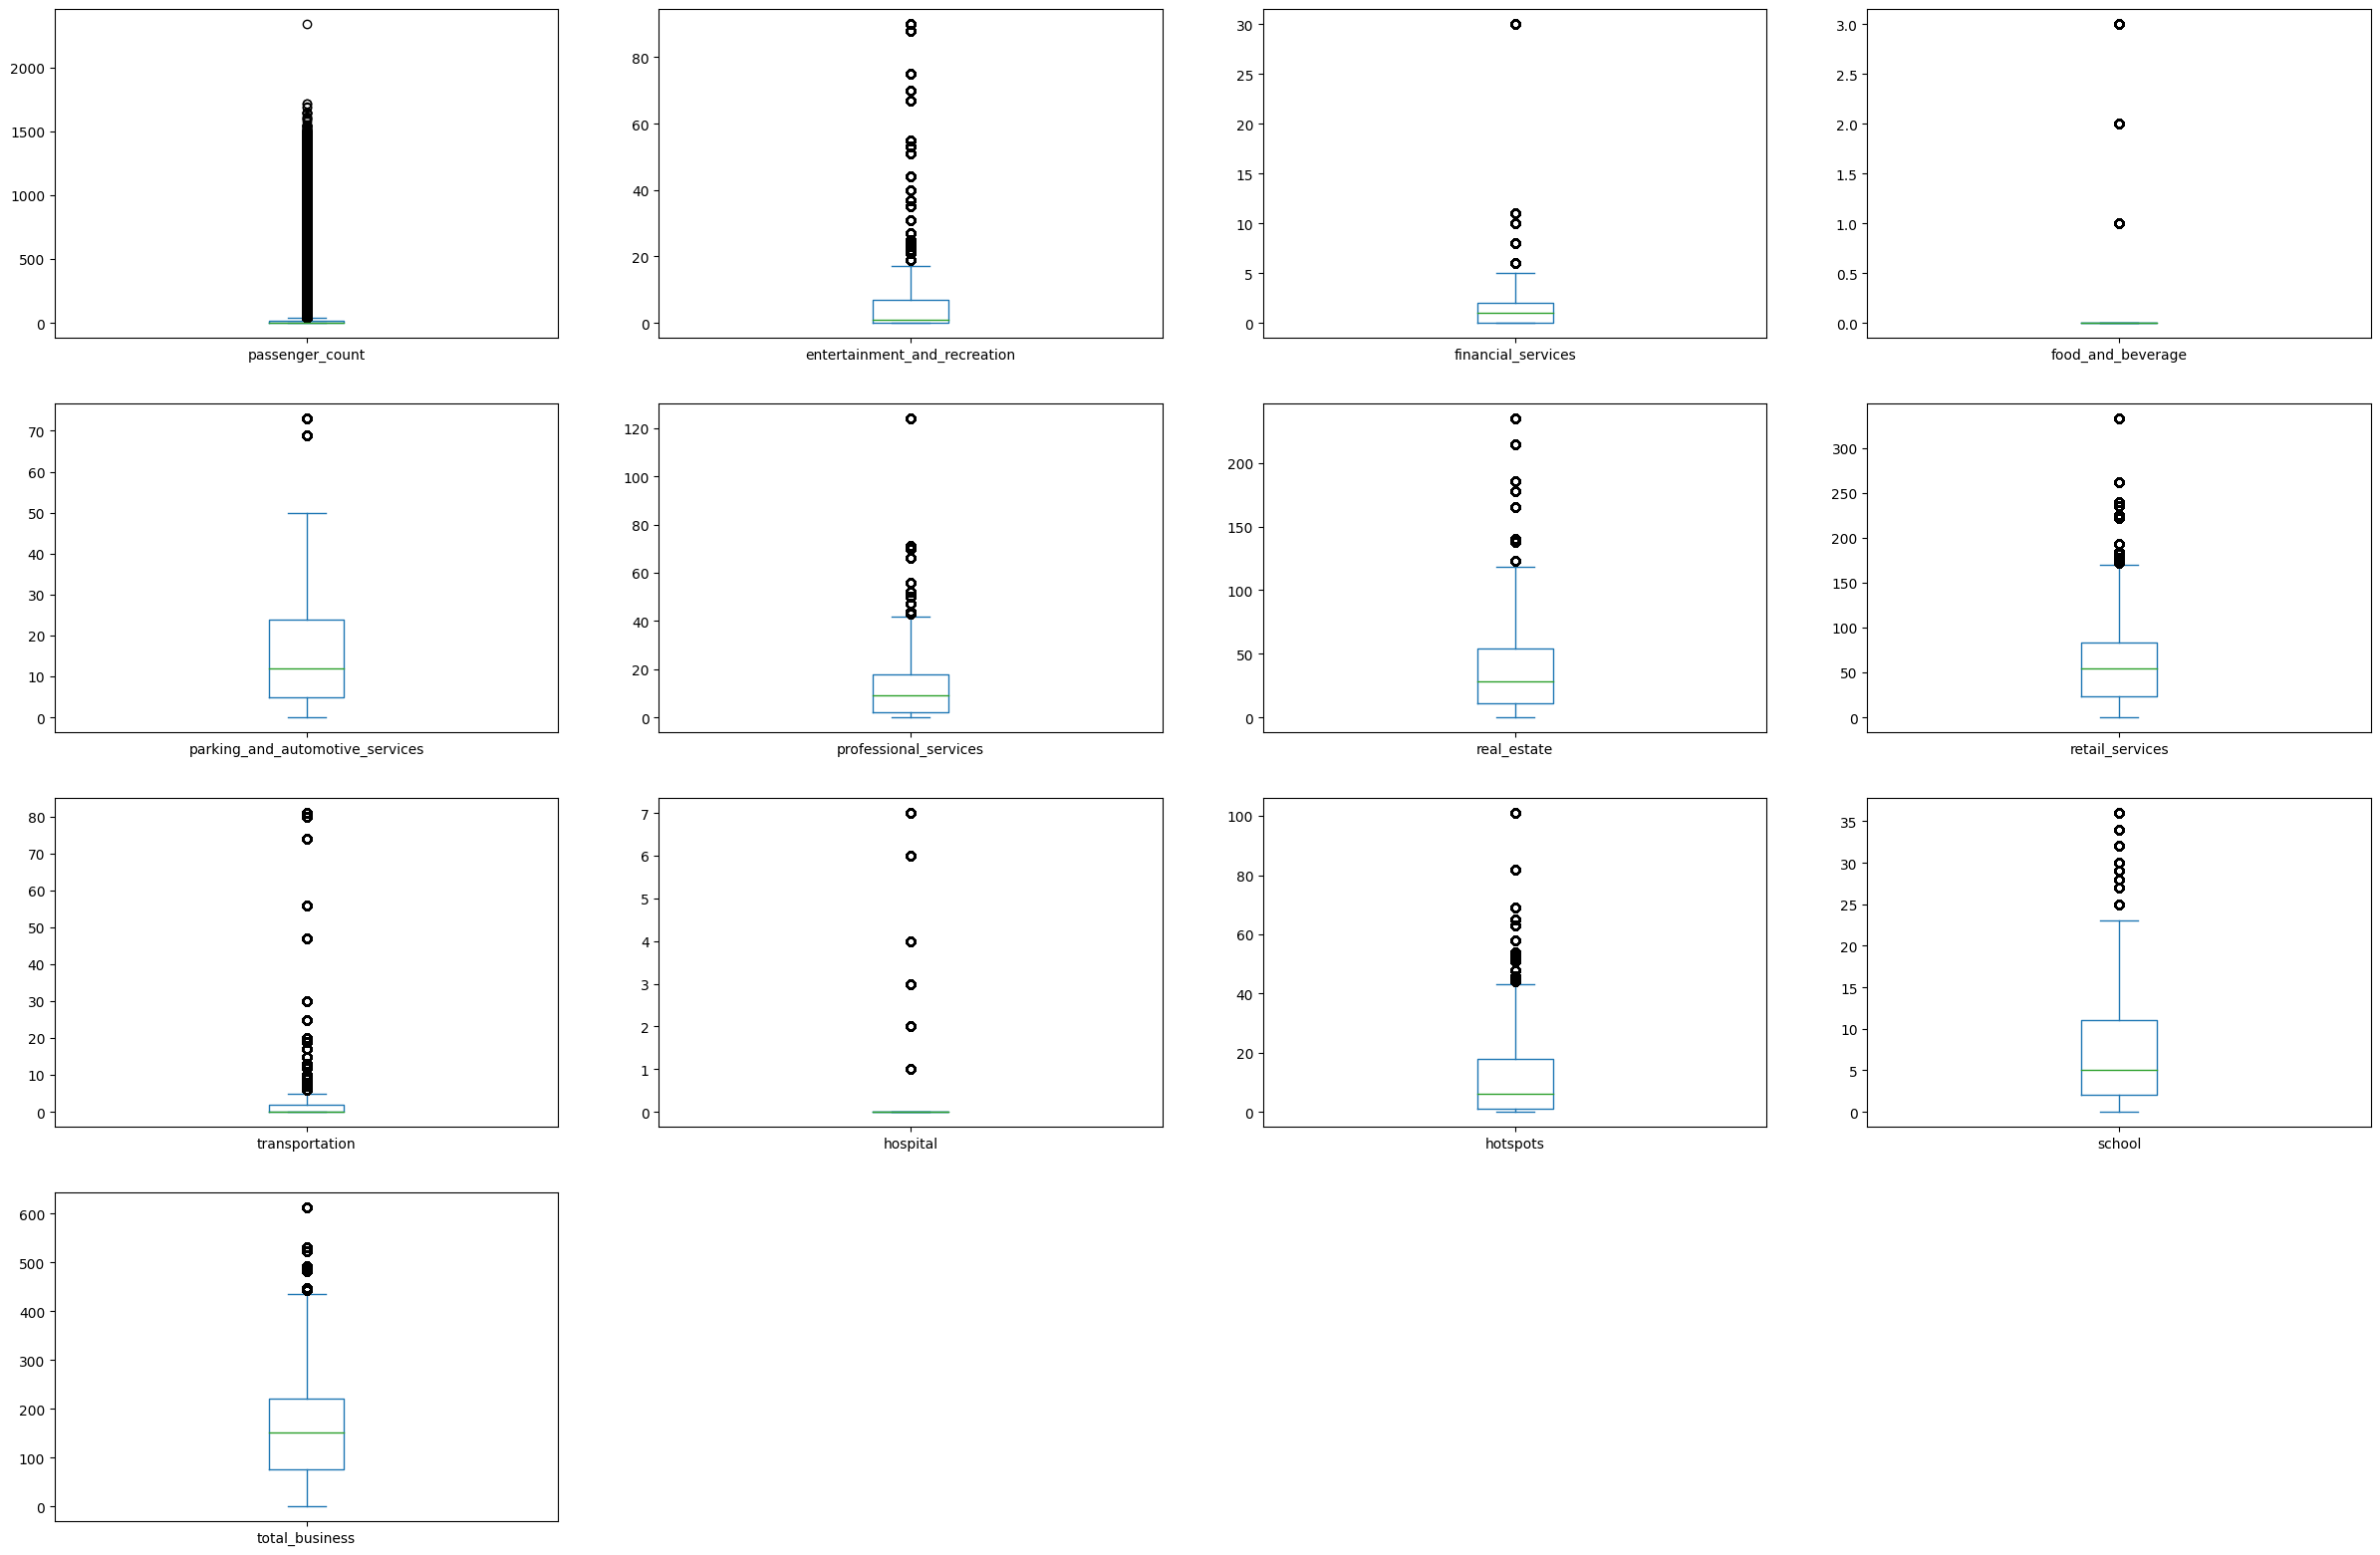

In [26]:
combined_df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
# plt.savefig('continuous_boxplots.pdf')


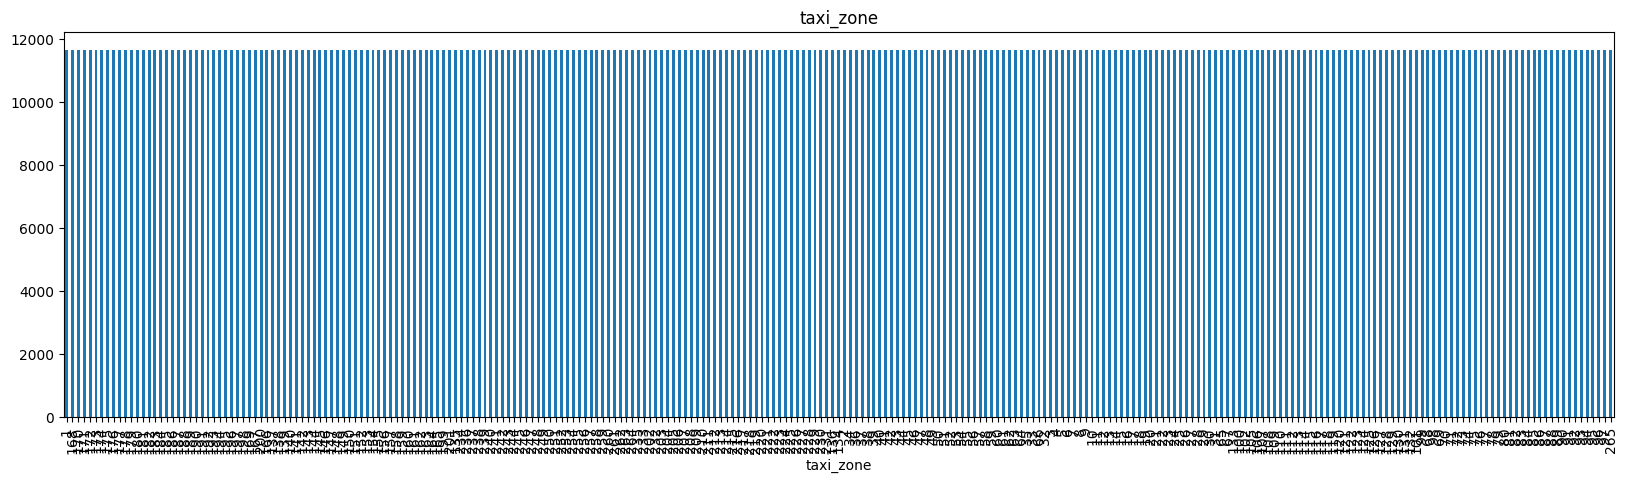

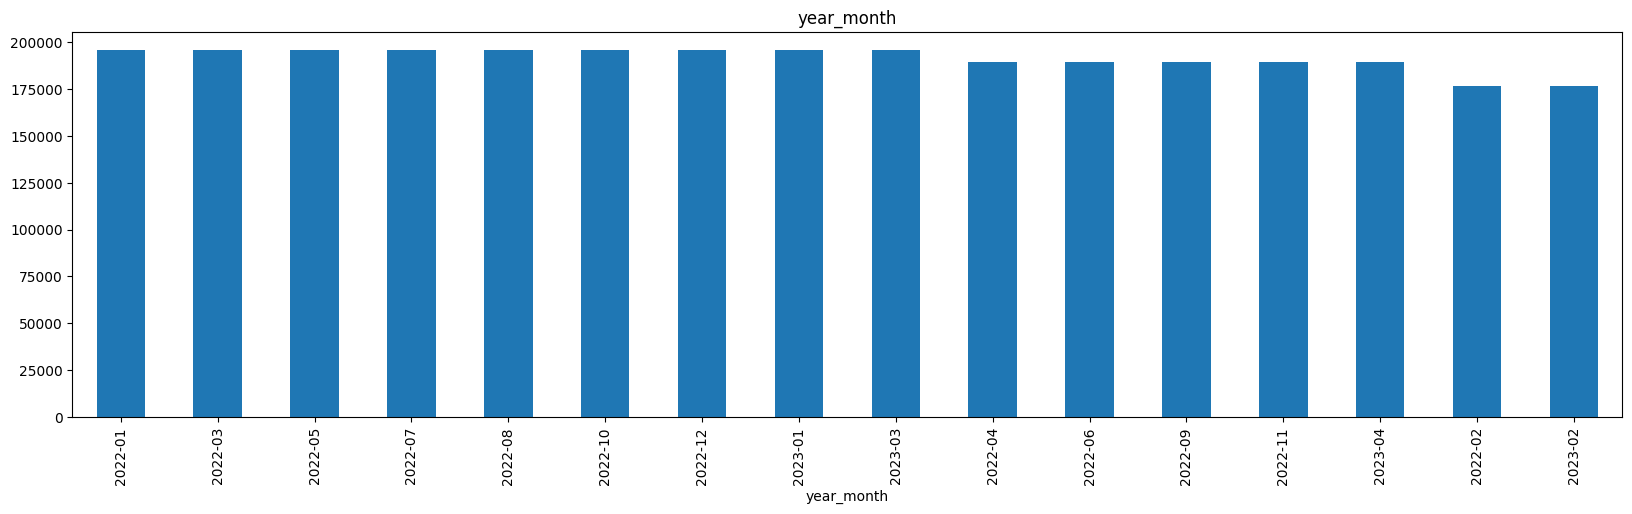

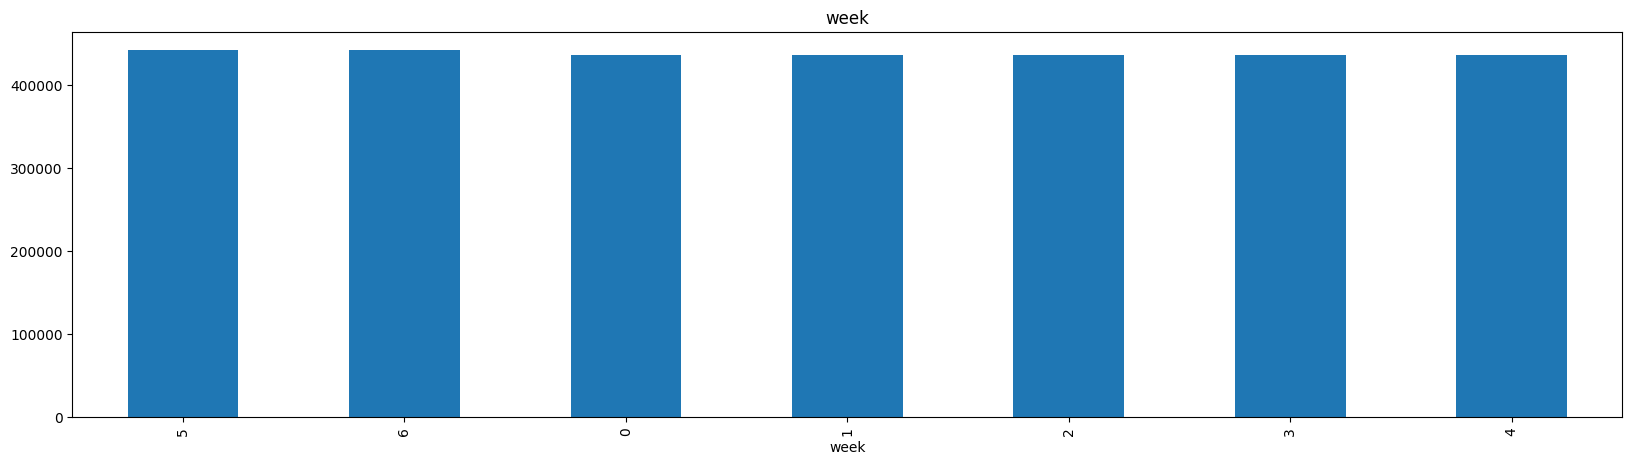

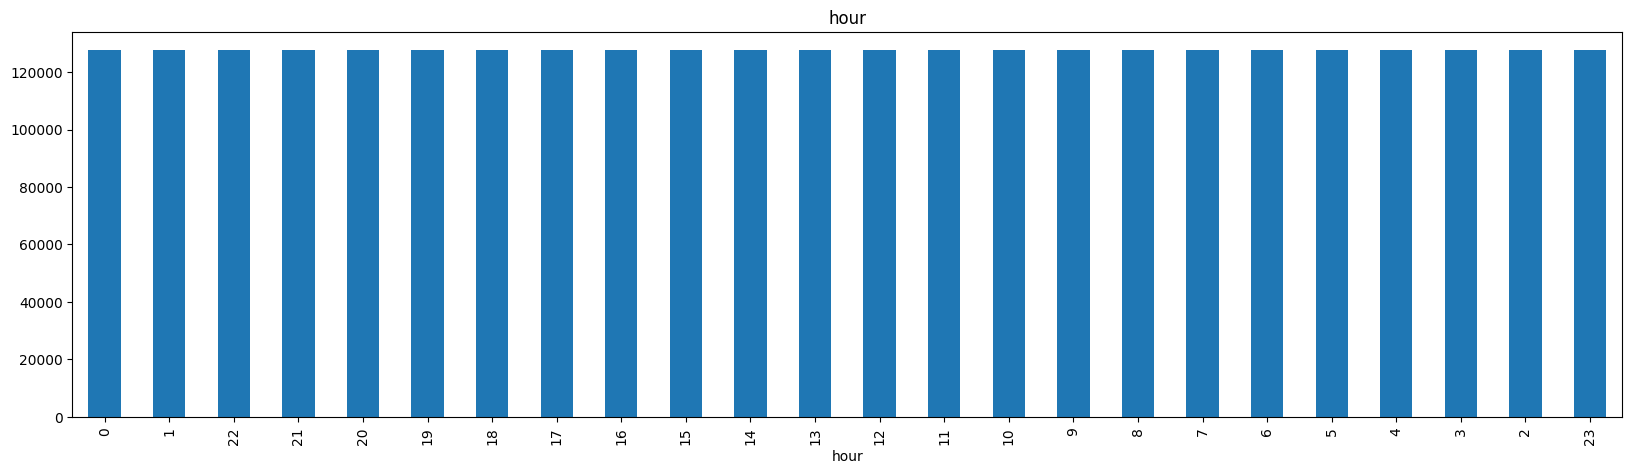

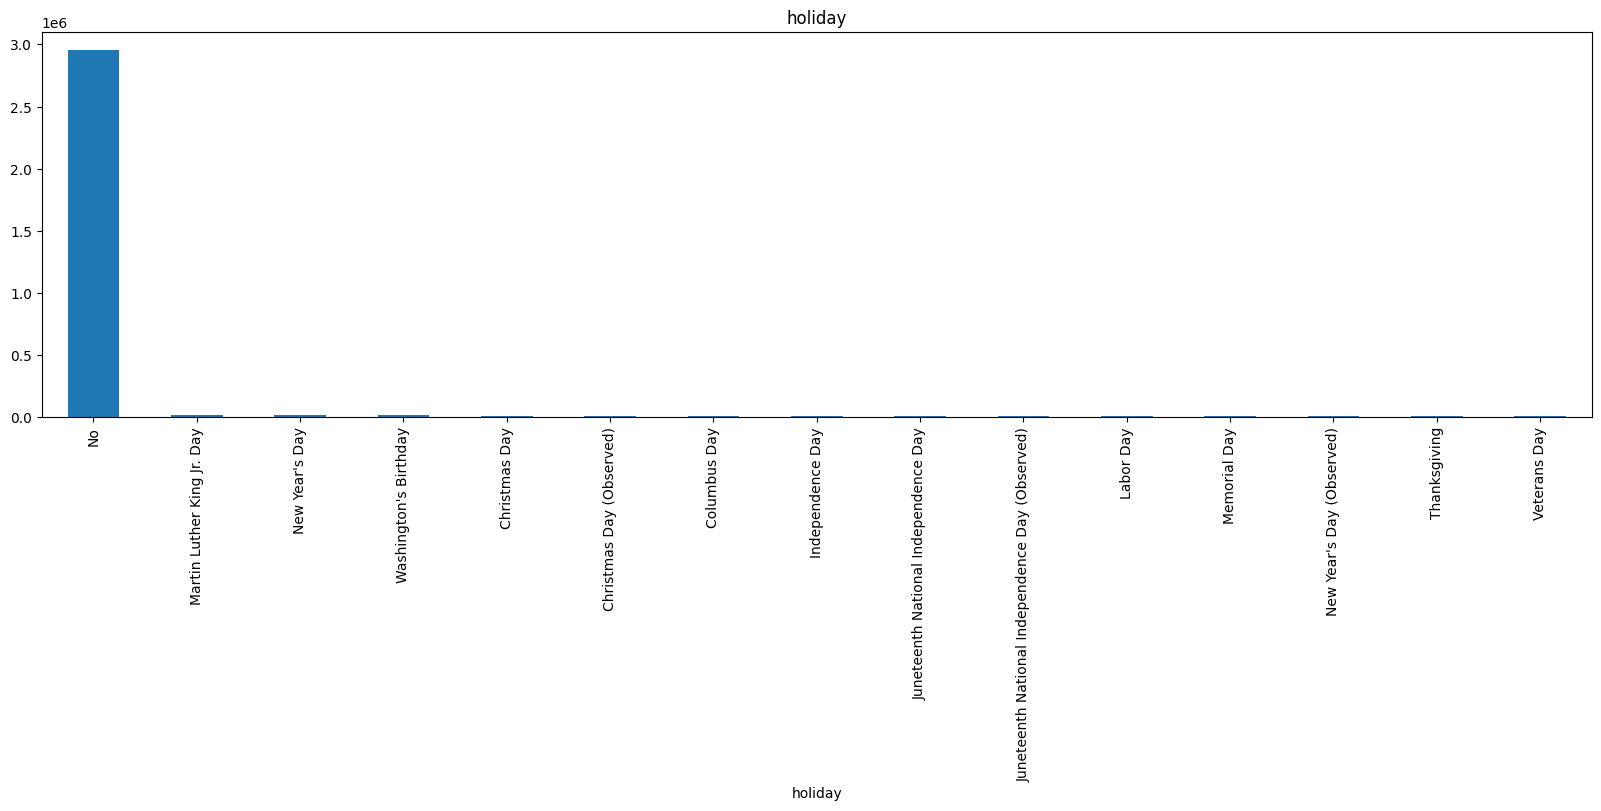

In [27]:
# Plot bar plots for all the catagorical features
for col in category_columns:
    f = combined_df[col].value_counts().plot(kind='bar', figsize=(20,5))
    plt.title(col)
#         pp.savefig(f.get_figure())
    plt.show()

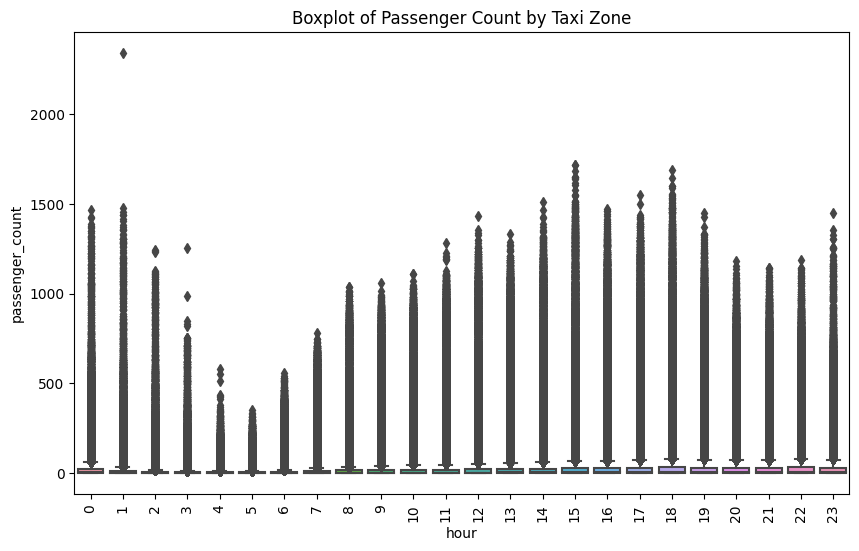

In [28]:
# sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='passenger_count', data=combined_df)
plt.title('Boxplot of Passenger Count by Taxi Zone')
plt.xticks(rotation=90)  # Rotates X-axis labels 90 degrees
plt.show()


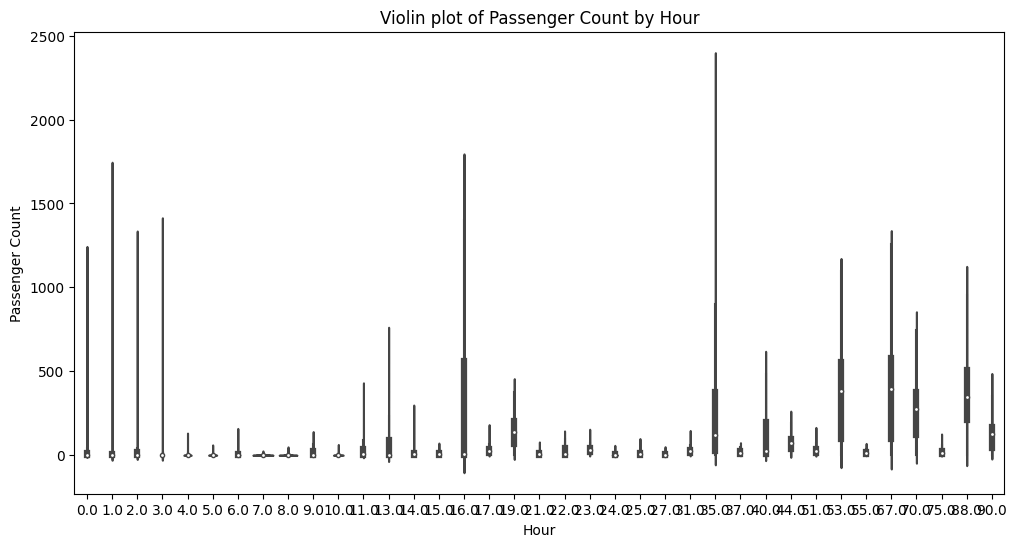

In [29]:
# Create a violin plot of 'passenger_count' grouped by 'hour'
plt.figure(figsize=(12, 6))  # This creates a new figure with specified size
sns.violinplot(x='entertainment_and_recreation', y='passenger_count', data=combined_df)

plt.title('Violin plot of Passenger Count by Hour')
plt.xlabel('Hour')
plt.ylabel('Passenger Count')
plt.show()

# Need to continue analysis the dataset from here

### try to analysis

In [30]:
cols_to_avg = ['taxi_zone', 'hour', 'passenger_count', 'entertainment_and_recreation', 
               'financial_services', 'food_and_beverage', 'parking_and_automotive_services', 
               'professional_services', 'real_estate', 'retail_services', 'transportation', 
               'hospital', 'hotspots', 'school',
               'total_business']

grouped_taxi_hour = combined_df[cols_to_avg].groupby(['taxi_zone', 'hour']).mean().reset_index()
grouped_taxi_hour.head(3000)

,taxi_zone,hour,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,0,1.088660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.956701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,1.059794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,3.340206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,10.084536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,127,19,8.020619,25.0,2.0,0.0,16.0,18.0,19.0,73.0,1.0,1.0,2.0,11.0,168.0
2996,127,20,8.494845,25.0,2.0,0.0,16.0,18.0,19.0,73.0,1.0,1.0,2.0,11.0,168.0
2997,127,21,9.202062,25.0,2.0,0.0,16.0,18.0,19.0,73.0,1.0,1.0,2.0,11.0,168.0
2998,127,22,11.032990,25.0,2.0,0.0,16.0,18.0,19.0,73.0,1.0,1.0,2.0,11.0,168.0


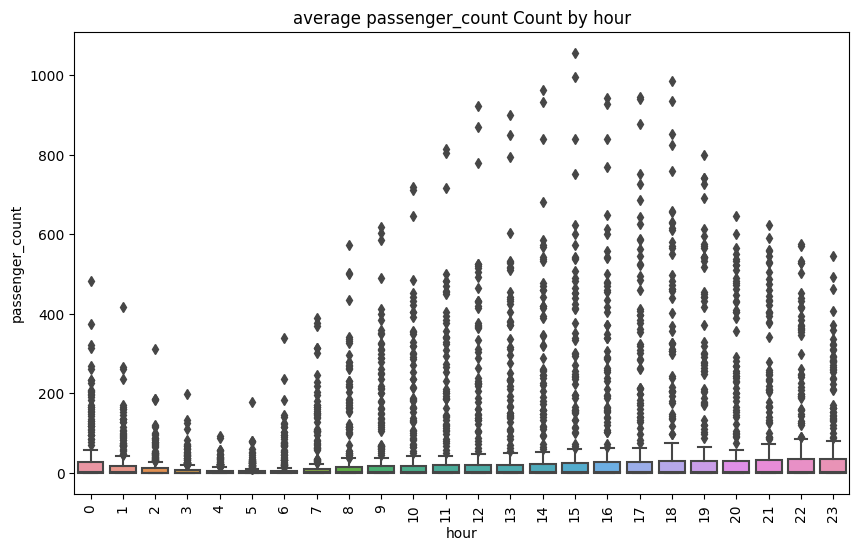

In [31]:
# sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.boxplot(x='hour', y='passenger_count', data=grouped_taxi_hour)
plt.title('average passenger_count Count by hour')
plt.xticks(rotation=90)  # Rotates X-axis labels 90 degrees
plt.show()


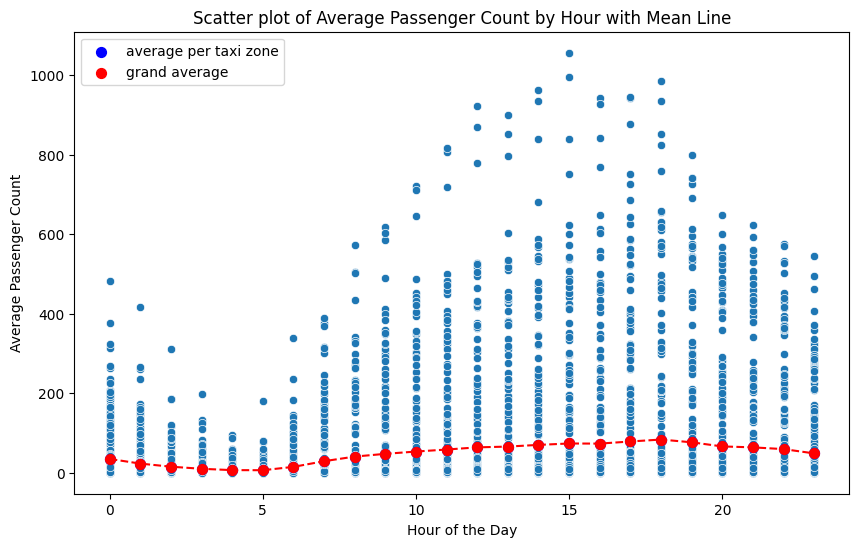

In [32]:
# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='hour', y='passenger_count', data=grouped_taxi_hour)
# Calculate mean of passenger_count for each hour
mean_passenger_count = grouped_taxi_hour.groupby('hour')['passenger_count'].mean()

# Add circle marker to the different taxi zone values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='blue', s=50, label='average per taxi zone')



# Add mean line
plt.plot(mean_passenger_count.index, mean_passenger_count.values, color='red', linestyle='dashed')

# Add circle marker to the mean values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='red', s=50, label='grand average')

# Set plot title and labels
plt.title('Scatter plot of Average Passenger Count by Hour with Mean Line')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')

# Display legend
plt.legend()

plt.show()


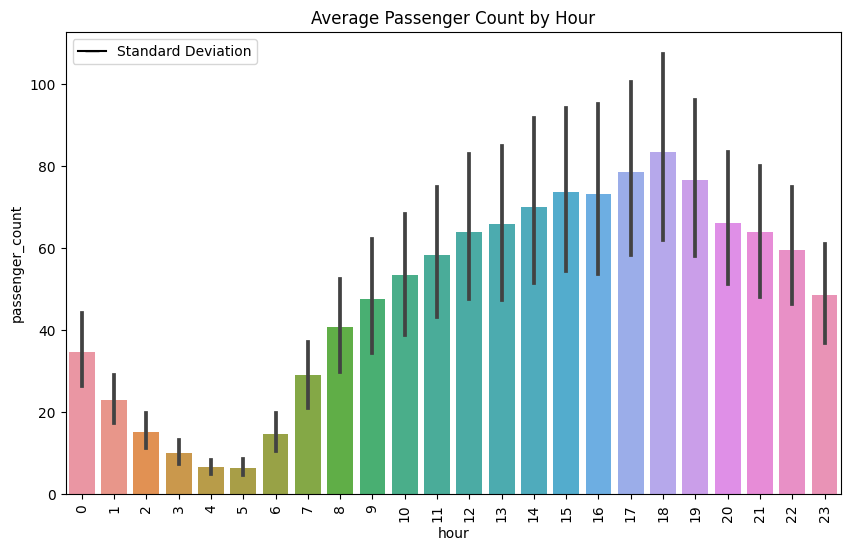

In [33]:
import matplotlib.lines as mlines

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='passenger_count', data=grouped_taxi_hour)

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

In [34]:


# Convert 'datetime' to datetime format if it's not already
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Create a new column 'date' by stripping hour information from 'datetime'
combined_df['date'] = combined_df['datetime'].dt.date

# Group by 'taxi_zone' and 'date', summing 'passenger_count', and keep first non-null values for other columns
grouped_day = combined_df.groupby(['taxi_zone', 'date']).agg({
    'passenger_count': 'sum',
    'year_month': 'first',
    'week': 'first',
    'entertainment_and_recreation': 'first',
    'financial_services': 'first',
    'food_and_beverage': 'first',
    'parking_and_automotive_services': 'first',
    'professional_services': 'first',
    'real_estate': 'first',
    'retail_services': 'first',
    'transportation': 'first',
    'hospital': 'first',
    'hotspots': 'first',
    'school': 'first',
    'total_business': 'first',
    'holiday': 'first'
}).reset_index()

grouped_day



,taxi_zone,date,passenger_count,year_month,week,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01,619.0,2022-01,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
1,1,2022-01-02,684.0,2022-01,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
2,1,2022-01-03,508.0,2022-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3,1,2022-01-04,311.0,2022-01,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
4,1,2022-01-05,260.0,2022-01,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127550,265,2023-04-26,779.0,2023-04,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
127551,265,2023-04-27,657.0,2023-04,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
127552,265,2023-04-28,641.0,2023-04,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
127553,265,2023-04-29,671.0,2023-04,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [35]:
grouped_day.head(80000)

,taxi_zone,date,passenger_count,year_month,week,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01,619.0,2022-01,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,New Year's Day
1,1,2022-01-02,684.0,2022-01,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
2,1,2022-01-03,508.0,2022-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
3,1,2022-01-04,311.0,2022-01,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
4,1,2022-01-05,260.0,2022-01,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,167,2023-04-01,23.0,2023-04,5,4.0,1.0,0.0,35.0,43.0,19.0,82.0,12.0,0.0,6.0,17.0,219.0,No
79996,167,2023-04-02,21.0,2023-04,6,4.0,1.0,0.0,35.0,43.0,19.0,82.0,12.0,0.0,6.0,17.0,219.0,No
79997,167,2023-04-03,27.0,2023-04,0,4.0,1.0,0.0,35.0,43.0,19.0,82.0,12.0,0.0,6.0,17.0,219.0,No
79998,167,2023-04-04,35.0,2023-04,1,4.0,1.0,0.0,35.0,43.0,19.0,82.0,12.0,0.0,6.0,17.0,219.0,No


In [36]:
print("holiday: ", grouped_day['holiday'].unique().tolist(), "\n")

holiday:  ["New Year's Day", 'No', 'Martin Luther King Jr. Day', "Washington's Birthday", 'Memorial Day', 'Juneteenth National Independence Day', 'Juneteenth National Independence Day (Observed)', 'Independence Day', 'Labor Day', 'Columbus Day', 'Veterans Day', 'Thanksgiving', 'Christmas Day', 'Christmas Day (Observed)', "New Year's Day (Observed)"] 



In [37]:
# Group by 'taxi_zone' and 'week', average 'passenger_count', and keep first non-null values for other columns
grouped_week = grouped_day.groupby(['taxi_zone', 'week']).agg({
    'passenger_count': 'mean',
    'year_month': 'first',
    'entertainment_and_recreation': 'first',
    'financial_services': 'first',
    'food_and_beverage': 'first',
    'parking_and_automotive_services': 'first',
    'professional_services': 'first',
    'real_estate': 'first',
    'retail_services': 'first',
    'transportation': 'first',
    'hospital': 'first',
    'hotspots': 'first',
    'school': 'first',
    'total_business': 'first'
}).reset_index()
grouped_week


,taxi_zone,week,passenger_count,year_month,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,0,523.753623,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,427.159420,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,479.782609,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,551.289855,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,4,586.362319,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,265,2,775.086957,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1837,265,3,830.217391,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1838,265,4,873.318841,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1839,265,5,730.642857,2022-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


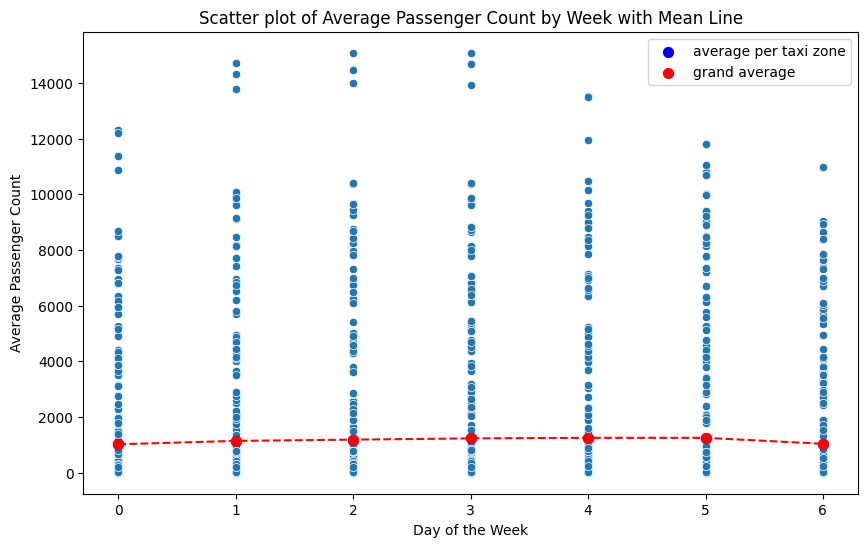

In [38]:
# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='week', y='passenger_count', data=grouped_week)
# Calculate mean of passenger_count for each hour
mean_passenger_count = grouped_week.groupby('week')['passenger_count'].mean()
# Add circle marker to the different taxi zone values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='blue', s=50, label='average per taxi zone')



# Add mean line
plt.plot(mean_passenger_count.index, mean_passenger_count.values, color='red', linestyle='dashed')

# Add circle marker to the mean values
plt.scatter(mean_passenger_count.index, mean_passenger_count.values, color='red', s=50, label='grand average')

# Set plot title and labels
plt.title('Scatter plot of Average Passenger Count by Week with Mean Line')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')

# Display legend
plt.legend()

plt.show()


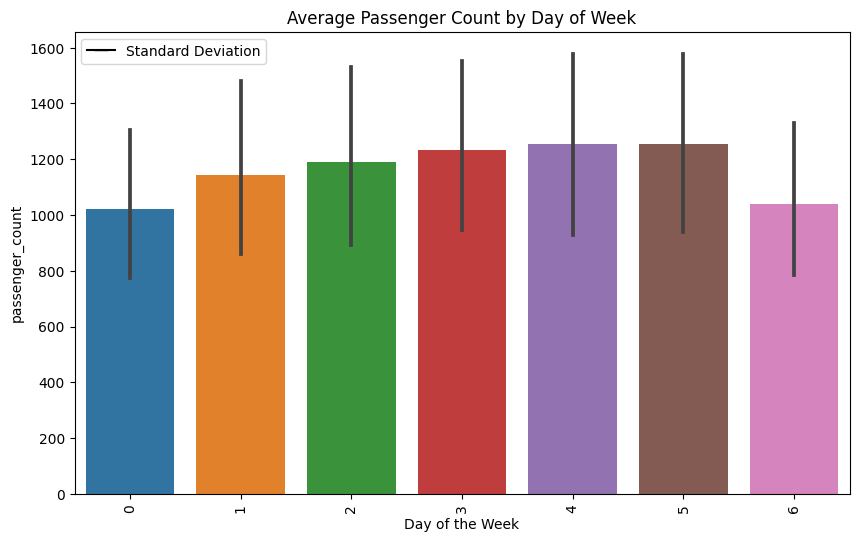

In [39]:
import matplotlib.lines as mlines

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='week', y='passenger_count', data=grouped_week)

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Day of Week')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')
plt.xlabel('Day of the Week')
# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

In [40]:


# Group by 'taxi_zone', average 'passenger_count', and keep first non-null values for other columns
grouped_day_taxi_zone = grouped_week.groupby('taxi_zone').agg({
    'passenger_count': 'mean',
    'entertainment_and_recreation': 'first',
    'financial_services': 'first',
    'food_and_beverage': 'first',
    'parking_and_automotive_services': 'first',
    'professional_services': 'first',
    'real_estate': 'first',
    'retail_services': 'first',
    'transportation': 'first',
    'hospital': 'first',
    'hotspots': 'first',
    'school': 'first',
    'total_business': 'first',
}).reset_index()
grouped_day_taxi_zone

,taxi_zone,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,536.794587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.327655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,13.068175,1.0,0.0,0.0,29.0,24.0,110.0,40.0,1.0,0.0,0.0,6.0,211.0
3,4,772.225643,0.0,0.0,0.0,0.0,2.0,5.0,22.0,0.0,0.0,0.0,9.0,38.0
4,5,3.744070,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0,0.0,0.0,2.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,261,1547.440728,2.0,4.0,0.0,4.0,2.0,4.0,36.0,0.0,0.0,11.0,3.0,66.0
259,262,4269.457853,1.0,0.0,0.0,40.0,2.0,11.0,30.0,2.0,0.0,0.0,1.0,87.0
260,263,6269.524963,70.0,0.0,0.0,36.0,11.0,40.0,58.0,5.0,0.0,14.0,4.0,238.0
261,264,2972.913931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
grouped_day_taxi_zone.dtypes

taxi_zone                          category
passenger_count                     float64
entertainment_and_recreation        float64
financial_services                  float64
food_and_beverage                   float64
parking_and_automotive_services     float64
professional_services               float64
real_estate                         float64
retail_services                     float64
transportation                      float64
hospital                            float64
hotspots                            float64
school                              float64
total_business                      float64
dtype: object

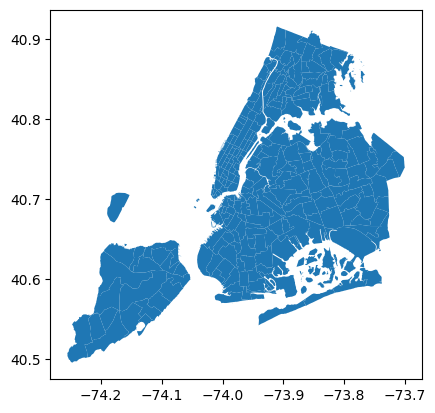

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the geojson file
gdf = gpd.read_file('NYC Taxi Zones.geojson')

# Plot the GeoDataFrame
gdf.plot()
plt.show()


In [43]:
gdf.dtypes
#gdf.tail()
#gdf['objectid'].max()

shape_area       object
objectid         object
shape_leng       object
location_id      object
zone             object
borough          object
geometry       geometry
dtype: object

In [44]:
grouped_day_taxi_zone['taxi_zone'] = grouped_day_taxi_zone['taxi_zone'].astype('object')
grouped_day_taxi_zone

# 263 unique values, min 1 max 265
# grouped_day_taxi_zone['taxi_zone'].max()

,taxi_zone,passenger_count,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business
0,1,536.794587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.327655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,13.068175,1.0,0.0,0.0,29.0,24.0,110.0,40.0,1.0,0.0,0.0,6.0,211.0
3,4,772.225643,0.0,0.0,0.0,0.0,2.0,5.0,22.0,0.0,0.0,0.0,9.0,38.0
4,5,3.744070,0.0,0.0,0.0,0.0,0.0,38.0,5.0,0.0,0.0,0.0,2.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,261,1547.440728,2.0,4.0,0.0,4.0,2.0,4.0,36.0,0.0,0.0,11.0,3.0,66.0
259,262,4269.457853,1.0,0.0,0.0,40.0,2.0,11.0,30.0,2.0,0.0,0.0,1.0,87.0
260,263,6269.524963,70.0,0.0,0.0,36.0,11.0,40.0,58.0,5.0,0.0,14.0,4.0,238.0
261,264,2972.913931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
gdf.tail()

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ..."
262,0.000122330270966,262,0.0490636231541,262,Yorkville East,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [46]:
test = gdf.location_id.astype(float)
test.nunique()
test


0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
258    256.0
259    259.0
260    260.0
261    261.0
262    262.0
Name: location_id, Length: 263, dtype: float64

In [47]:
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
from folium.plugins import HeatMap




# Merge GeoDataFrame and DataFrame
gdf['location_id'] = gdf['location_id'].astype('int')
merged = gdf.set_index('location_id').join(grouped_day_taxi_zone.set_index('taxi_zone'))
gdf['location_id'] = gdf['location_id'].astype('object')

merged
merged['passenger_count'] = merged['passenger_count'] + 1







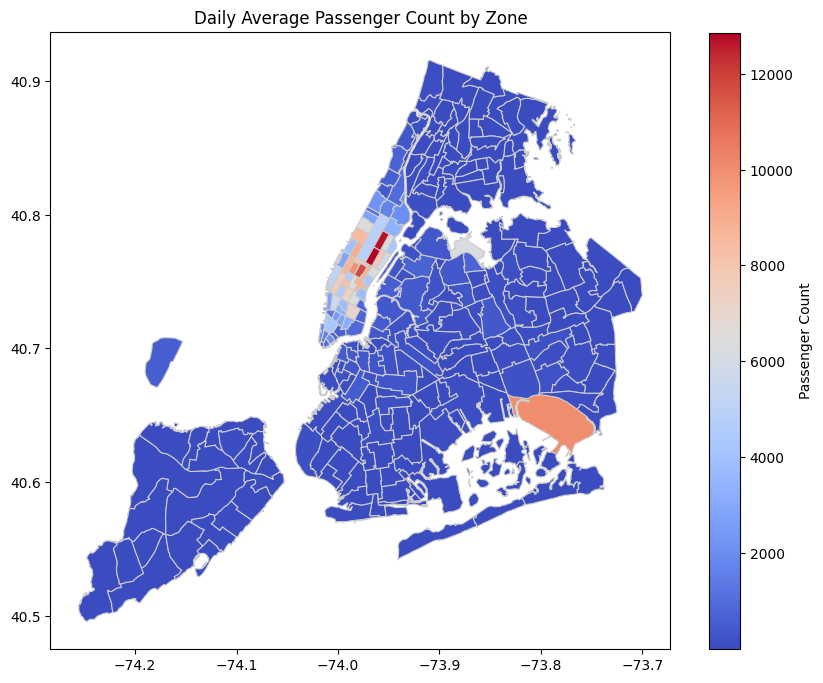

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged.plot(column='passenger_count', 
            cmap='coolwarm', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            legend=True,
            legend_kwds={'label': "Passenger Count",
                         'orientation': "vertical",
                         'shrink': 0.8})

# Set the title
plt.title('Daily Average Passenger Count by Zone')
plt.show()


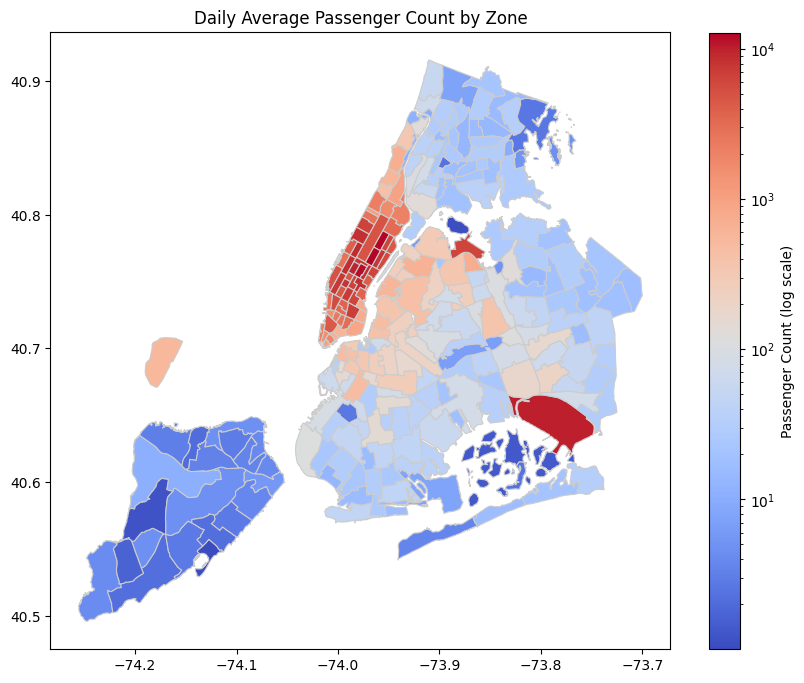

In [49]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Use a logarithmic color scale
norm = colors.LogNorm(vmin=merged['passenger_count'].min(), vmax=merged['passenger_count'].max())

merged.plot(column='passenger_count', 
            cmap='coolwarm', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8',
            legend=True,
            norm=norm,
            legend_kwds={'label': "Passenger Count (log scale)",
                         'orientation': "vertical",
                         'shrink': 0.8})

# Set the title
plt.title('Daily Average Passenger Count by Zone')

plt.show()



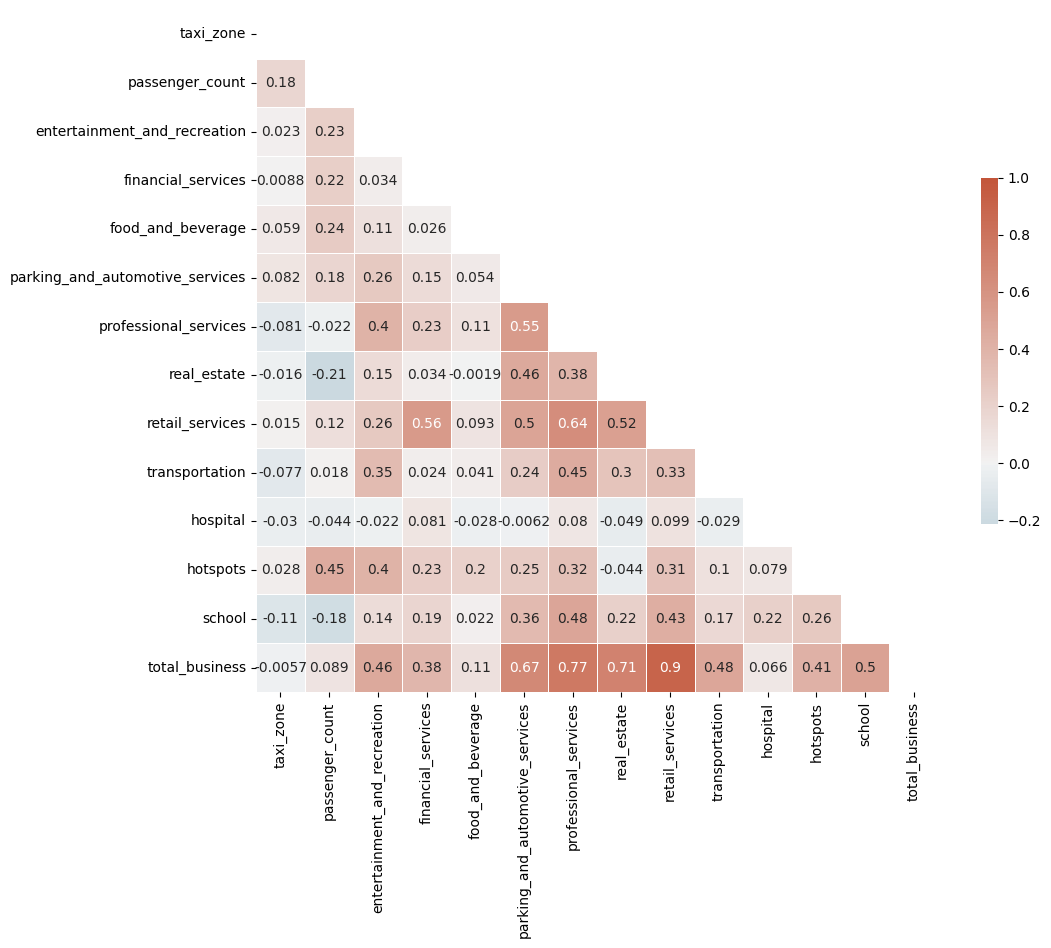

In [50]:
# Calculate the correlation matrix
corr = grouped_day_taxi_zone.corr()

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

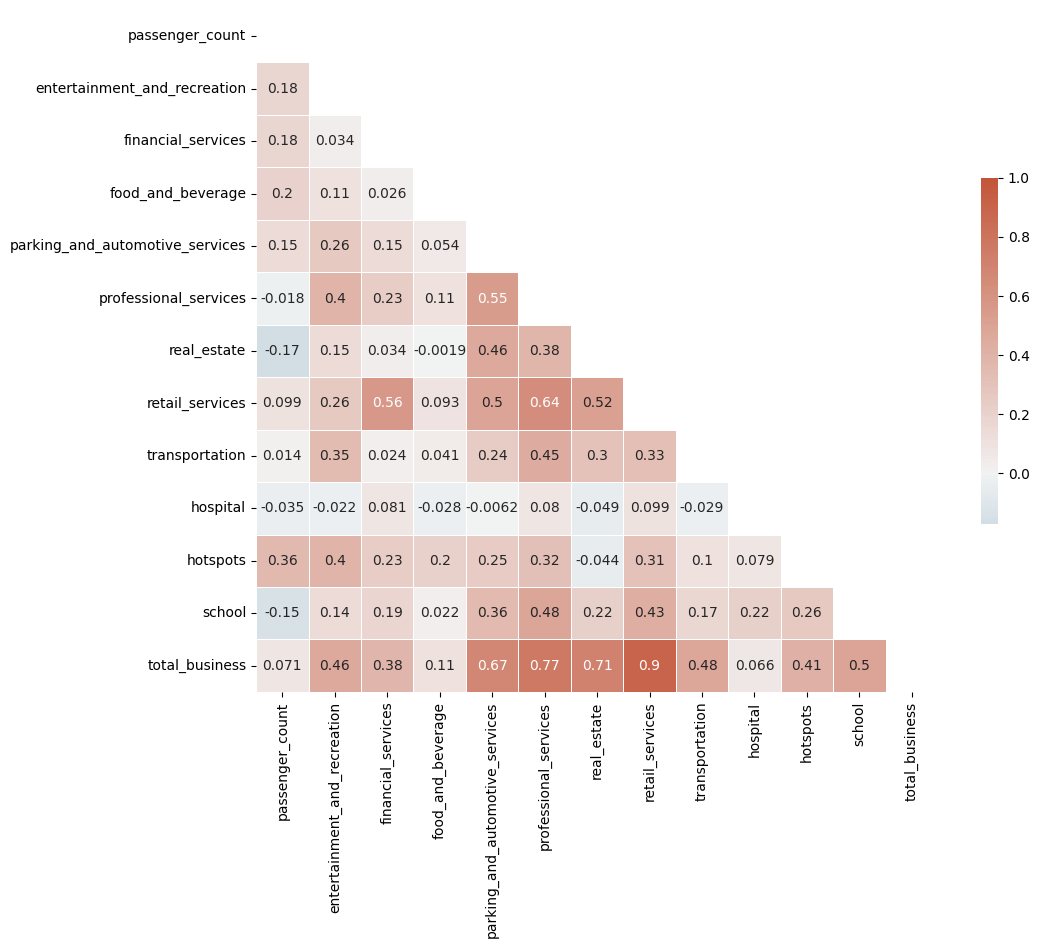

In [51]:
# Select only the numerical columns from the dataframe
numerical_features = combined_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numerical_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


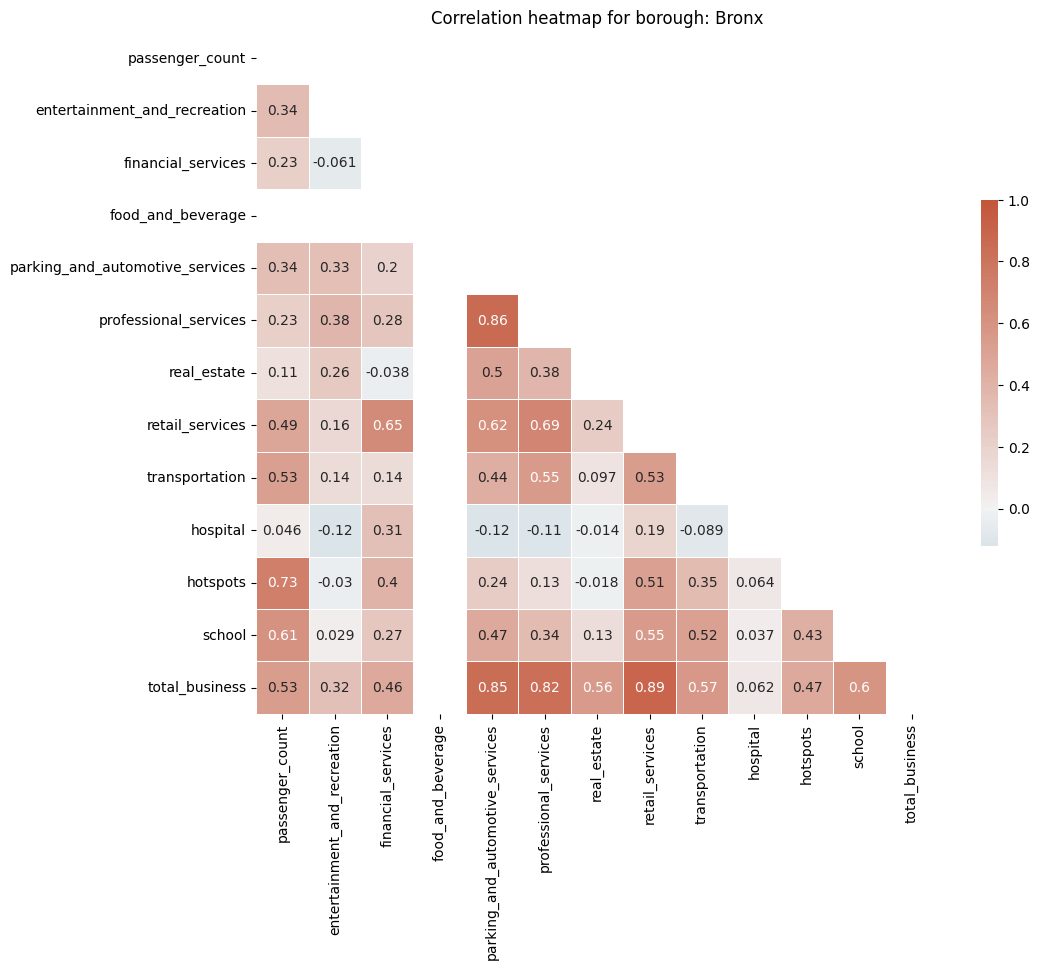

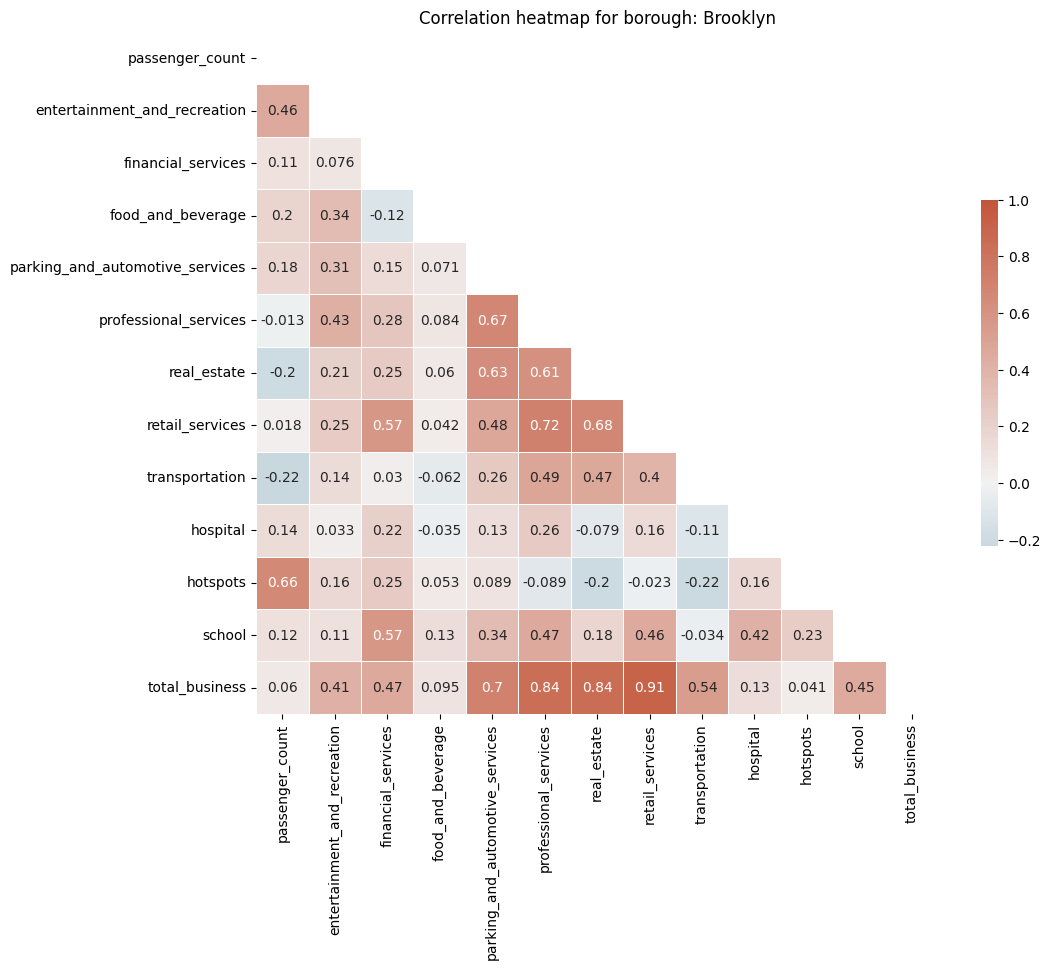

/Users/lalazhou/opt/anaconda3/envs/research_project/lib/python3.8/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


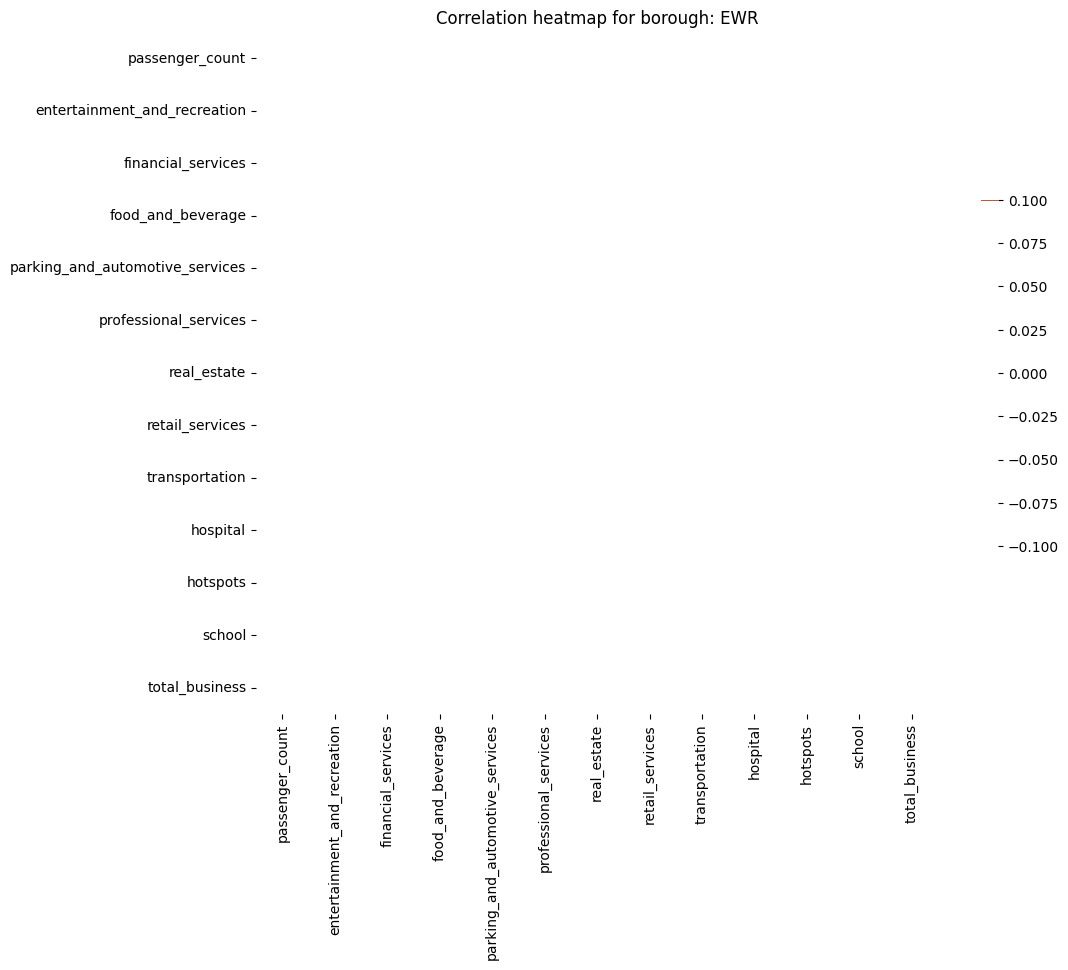

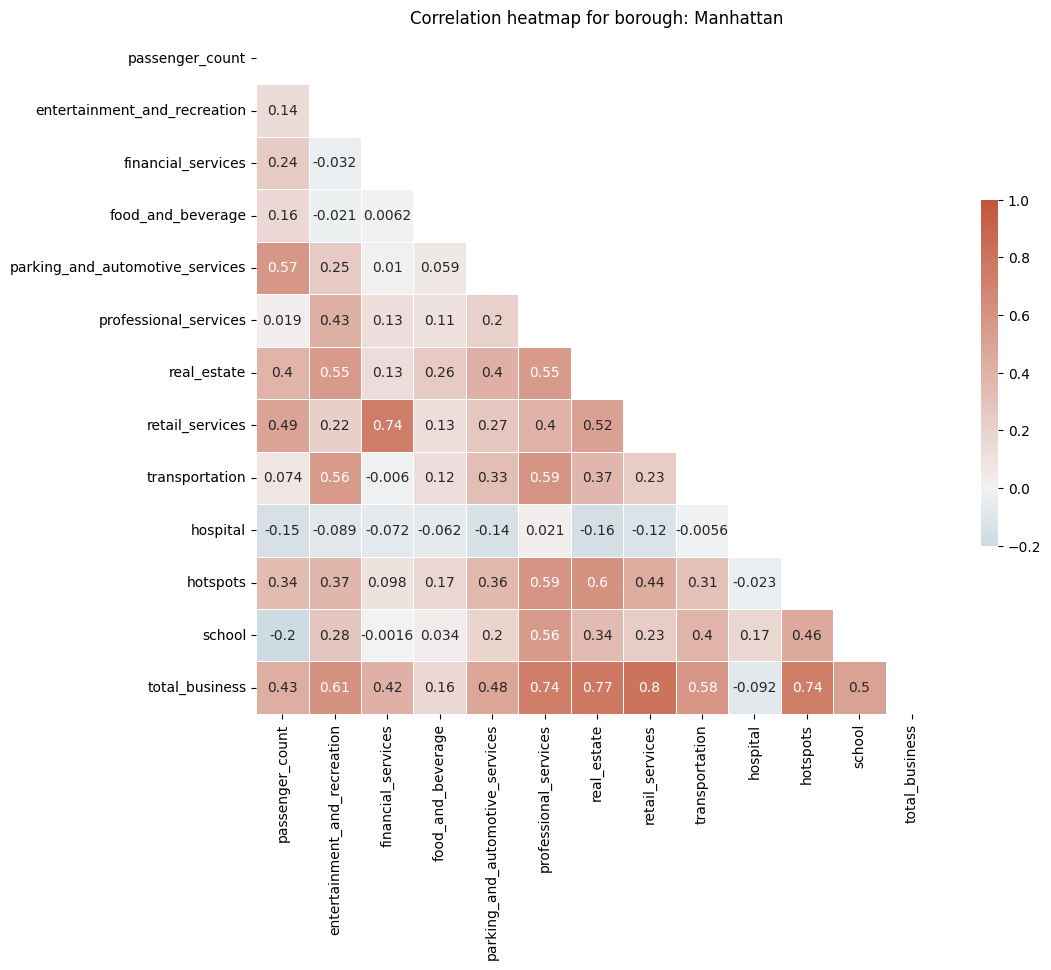

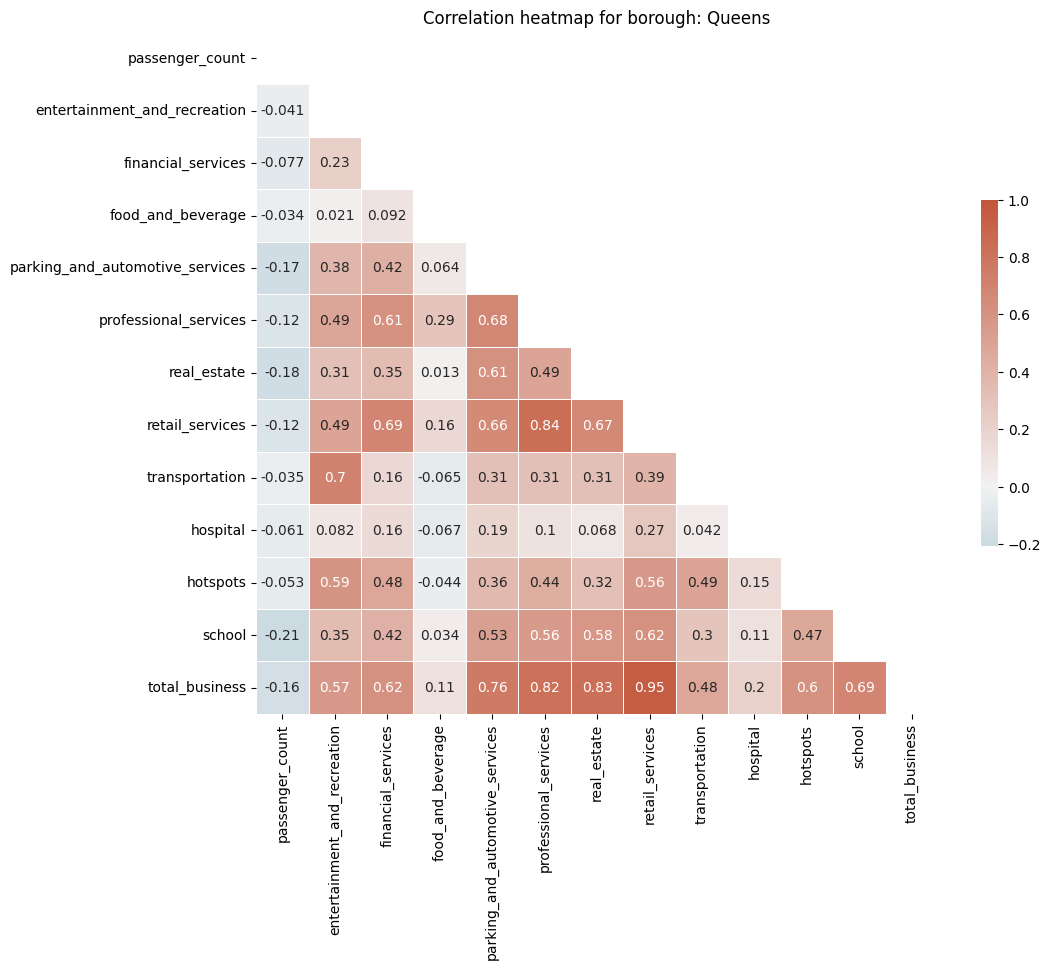

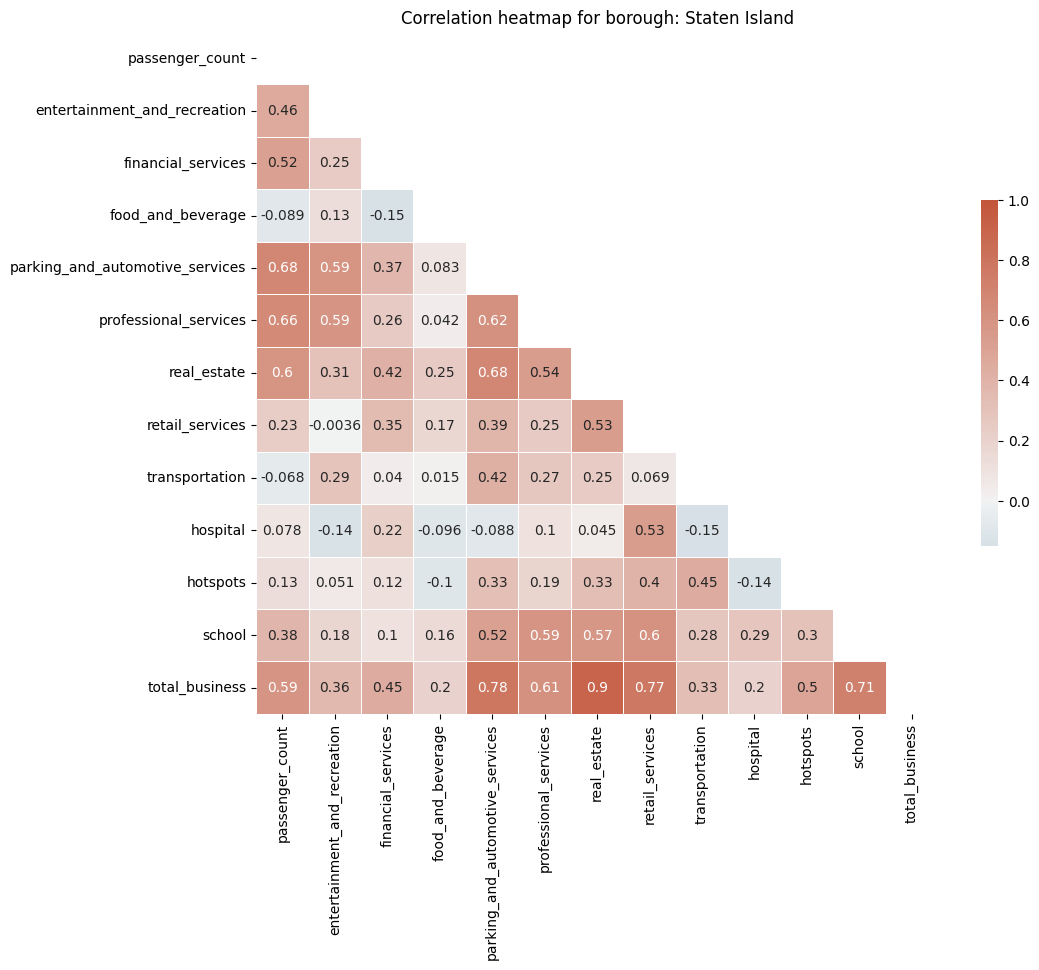

""


In [52]:
def plot_corr_heatmap(df):
    # Only include numerical columns in the correlation calculation
    numerical_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr = numerical_df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.title("Correlation heatmap for borough: " + df['borough'].iloc[0])
    plt.show()

# Group by borough and apply the function to each group
merged.groupby('borough').apply(plot_corr_heatmap)
